Project 4

# Import Library

In [407]:
import pandas as pd
import numpy as np
import re
import time
from functools import reduce
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import GaussianRandomProjection
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.utils import resample
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, roc_auc_score, silhouette_score, calinski_harabasz_score, davies_bouldin_score, precision_recall_fscore_support

# import Dataset



In [ ]:
df = pd.read_csv('Dataset.csv', encoding='iso-8859-1')

In [ ]:
df

,Index,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,...,FEATURE73,FEATURE74,FEATURE75,FEATURE76,FEATURE77,FEATURE78,FEATURE79,FEATURE80,FEATURE81,Class Label
0,1,718,0,2,2,2,1,17,0,12,...,62,118,9,0,77,1,7.121212,1.909091,25,0
1,2,218,0,2,2,2,1,15,0,7,...,41,41,1,1,23,0,4.545455,1.090909,2,0
2,3,4,0,1,1,1,1,3,0,3,...,0,2,0,0,1,0,2.000000,1.000000,2,0
3,4,5,0,2,2,2,1,4,0,4,...,245,279,0,0,0,0,0.000000,0.000000,0,0
4,5,19,0,1,1,1,1,9,0,4,...,2,2,0,0,1,1,1.000000,1.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298169,298170,100,0,1,1,1,1,8,0,4,...,13,14,0,0,10,1,1.444444,1.000000,2,0
298170,298171,16,0,2,2,2,1,15,3,12,...,3,3,0,0,2,0,6.000000,1.000000,3,0
298171,298172,111,1,1,1,1,1,6,0,4,...,29,25,0,0,13,2,1.692308,1.000000,1,0
298172,298173,98,0,1,1,1,1,4,0,3,...,39,29,0,0,15,1,1.866667,1.000000,5,0


In [ ]:
df.columns

Index(['Index', 'FEATURE1', 'FEATURE2', 'FEATURE3', 'FEATURE4', 'FEATURE5',
       'FEATURE6', 'FEATURE7', 'FEATURE8', 'FEATURE9', 'FEATURE10',
       'FEATURE11', 'FEATURE12', 'FEATURE13', 'FEATURE14', 'FEATURE15',
       'FEATURE16', 'FEATURE17', 'FEATURE18', 'FEATURE19', 'FEATURE20',
       'FEATURE21', 'FEATURE22', 'FEATURE23', 'FEATURE24', 'FEATURE25',
       'FEATURE26', 'FEATURE27', 'FEATURE28', 'FEATURE29', 'FEATURE30',
       'FEATURE31', 'FEATURE32', 'FEATURE33', 'FEATURE34', 'FEATURE35',
       'FEATURE36', 'FEATURE37', 'FEATURE38', 'FEATURE39', 'FEATURE40',
       'FEATURE41', 'FEATURE42', 'FEATURE43', 'FEATURE44', 'FEATURE45',
       'FEATURE46', 'FEATURE47', 'FEATURE48', 'FEATURE49', 'FEATURE50',
       'FEATURE51', 'FEATURE52', 'FEATURE53', 'FEATURE54', 'FEATURE55',
       'FEATURE56', 'FEATURE57', 'FEATURE58', 'FEATURE59', 'FEATURE60',
       'FEATURE61', 'FEATURE62', 'FEATURE63', 'FEATURE64', 'FEATURE65',
       'FEATURE66', 'FEATURE67', 'FEATURE68', 'FEATURE69', 'FEAT

# Preprocessing

## normalization


In [ ]:
# Define z-score normalization function
def z_score_normalize(coord):
    mean_val = coord.mean()
    std_val = coord.std()
    return (coord - mean_val) / std_val

In [ ]:
# Select columns 'FEATURE1' to 'FEATURE81'
features_columns = df.loc[:, 'FEATURE1':'FEATURE81']

# Apply z_score_normalize function to selected columns
normalized_features = features_columns.apply(z_score_normalize, axis=0)

# Replace the original columns with the normalized values
df.loc[:, 'FEATURE1':'FEATURE81'] = normalized_features

In [ ]:
# normalized dataframe
df

,Index,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,...,FEATURE73,FEATURE74,FEATURE75,FEATURE76,FEATURE77,FEATURE78,FEATURE79,FEATURE80,FEATURE81,Class Label
0,1,1.890391,-0.073243,0.034108,0.083643,-0.026884,-0.220401,0.377566,-0.329882,0.270675,...,0.210221,1.050467,1.374707,-0.296158,-0.034001,0.157306,0.155906,-0.064600,2.644631,0
1,2,0.276235,-0.073243,0.034108,0.083643,-0.026884,-0.220401,0.225989,-0.329882,-0.214906,...,0.043259,0.102175,-0.293301,0.668267,-0.034002,-0.878343,-0.160573,-0.495035,-0.438186,0
2,3,-0.414624,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.683471,-0.329882,-0.603371,...,-0.282714,-0.378129,-0.501802,-0.296158,-0.034003,-0.878343,-0.473329,-0.542861,-0.438186,0
3,4,-0.411395,-0.073243,0.034108,0.083643,-0.026884,-0.220401,-0.607683,-0.329882,-0.506255,...,1.665174,3.033261,-0.501802,-0.296158,-0.034003,-0.878343,-0.719065,-1.068949,-0.706257,0
4,5,-0.366199,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.228741,-0.329882,-0.506255,...,-0.266813,-0.378129,-0.501802,-0.296158,-0.034003,0.157306,-0.596197,-0.542861,-0.572221,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298169,298170,-0.104706,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.304530,-0.329882,-0.506255,...,-0.179357,-0.230343,-0.501802,-0.296158,-0.034003,0.157306,-0.541589,-0.542861,-0.438186,0
298170,298171,-0.375884,-0.073243,0.034108,0.083643,-0.026884,-0.220401,0.225989,1.625554,0.270675,...,-0.258863,-0.365814,-0.501802,-0.296158,-0.034003,-0.878343,0.018145,-0.542861,-0.304150,0
298171,298172,-0.069194,0.030225,-0.373515,-0.469795,-0.388577,-0.220401,-0.456106,-0.329882,-0.506255,...,-0.052148,-0.094873,-0.501802,-0.296158,-0.034003,1.192955,-0.511134,-0.542861,-0.572221,0
298172,298173,-0.111162,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.607683,-0.329882,-0.603371,...,0.027358,-0.045611,-0.501802,-0.296158,-0.034002,0.157306,-0.489711,-0.542861,-0.036079,0


In [ ]:
df_copy = df.copy()

In [ ]:
# data frame without index and class label
columns_to_remove = ['Index', 'Class Label']
df_copy = df_copy.drop(columns=columns_to_remove).copy()

In [ ]:
df_copy

,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,FEATURE10,...,FEATURE72,FEATURE73,FEATURE74,FEATURE75,FEATURE76,FEATURE77,FEATURE78,FEATURE79,FEATURE80,FEATURE81
0,1.890391,-0.073243,0.034108,0.083643,-0.026884,-0.220401,0.377566,-0.329882,0.270675,0.240670,...,1.992450,0.210221,1.050467,1.374707,-0.296158,-0.034001,0.157306,0.155906,-0.064600,2.644631
1,0.276235,-0.073243,0.034108,0.083643,-0.026884,-0.220401,0.225989,-0.329882,-0.214906,1.014423,...,0.923138,0.043259,0.102175,-0.293301,0.668267,-0.034002,-0.878343,-0.160573,-0.495035,-0.438186
2,-0.414624,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.683471,-0.329882,-0.603371,-0.533083,...,-1.261301,-0.282714,-0.378129,-0.501802,-0.296158,-0.034003,-0.878343,-0.473329,-0.542861,-0.438186
3,-0.411395,-0.073243,0.034108,0.083643,-0.026884,-0.220401,-0.607683,-0.329882,-0.506255,-0.533083,...,-1.870634,1.665174,3.033261,-0.501802,-0.296158,-0.034003,-0.878343,-0.719065,-1.068949,-0.706257
4,-0.366199,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.228741,-0.329882,-0.506255,0.756505,...,-1.261301,-0.266813,-0.378129,-0.501802,-0.296158,-0.034003,0.157306,-0.596197,-0.542861,-0.572221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298169,-0.104706,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.304530,-0.329882,-0.506255,0.240670,...,0.237314,-0.179357,-0.230343,-0.501802,-0.296158,-0.034003,0.157306,-0.541589,-0.542861,-0.438186
298170,-0.375884,-0.073243,0.034108,0.083643,-0.026884,-0.220401,0.225989,1.625554,0.270675,-0.533083,...,-0.904863,-0.258863,-0.365814,-0.501802,-0.296158,-0.034003,-0.878343,0.018145,-0.542861,-0.304150
298171,-0.069194,0.030225,-0.373515,-0.469795,-0.388577,-0.220401,-0.456106,-0.329882,-0.506255,-0.275166,...,0.449315,-0.052148,-0.094873,-0.501802,-0.296158,-0.034003,1.192955,-0.511134,-0.542861,-0.572221
298172,-0.111162,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.607683,-0.329882,-0.603371,-0.533083,...,0.566700,0.027358,-0.045611,-0.501802,-0.296158,-0.034002,0.157306,-0.489711,-0.542861,-0.036079


## Incompatible Data

In [ ]:
def remove_col_with_unique_values(df):
    features_columns = df.loc[:, 'FEATURE1':'FEATURE81']
    res = df
    for col in features_columns:
        if len(df[col].unique()) == 1:
            res = res.drop(col,axis=1)
    return res

# res_z = remove_col_with_unique_values(df_clean_z)
df_copy = remove_col_with_unique_values(df_copy)

# 3.correlation

In [ ]:
data = features_columns

In [ ]:
correlation_matrix = data.corr(method = 'pearson')
correlation_matrix = correlation_matrix.abs()
print(correlation_matrix)

           FEATURE1  FEATURE2  FEATURE3  FEATURE4  FEATURE5  FEATURE6  \
FEATURE1   1.000000  0.194772  0.272827  0.253990  0.273567  0.169691   
FEATURE2   0.194772  1.000000  0.038895  0.030047  0.040070  0.027495   
FEATURE3   0.272827  0.038895  1.000000  0.954018  0.977963  0.617367   
FEATURE4   0.253990  0.030047  0.954018  1.000000  0.942312  0.578054   
FEATURE5   0.273567  0.040070  0.977963  0.942312  1.000000  0.615267   
...             ...       ...       ...       ...       ...       ...   
FEATURE77  0.333374  0.060944  0.194118  0.187794  0.191620  0.129103   
FEATURE78  0.189788  0.013896  0.069393  0.084531  0.063321  0.039747   
FEATURE79  0.288409  0.021196  0.819600  0.807177  0.807397  0.497279   
FEATURE80  0.206621  0.000188  0.649800  0.685087  0.641638  0.338545   
FEATURE81  0.549632  0.035960  0.272332  0.272793  0.270914  0.142527   

           FEATURE7  FEATURE8  FEATURE9  FEATURE10  ...  FEATURE72  FEATURE73  \
FEATURE1   0.345911  0.180504  0.297928   

## Heat Map

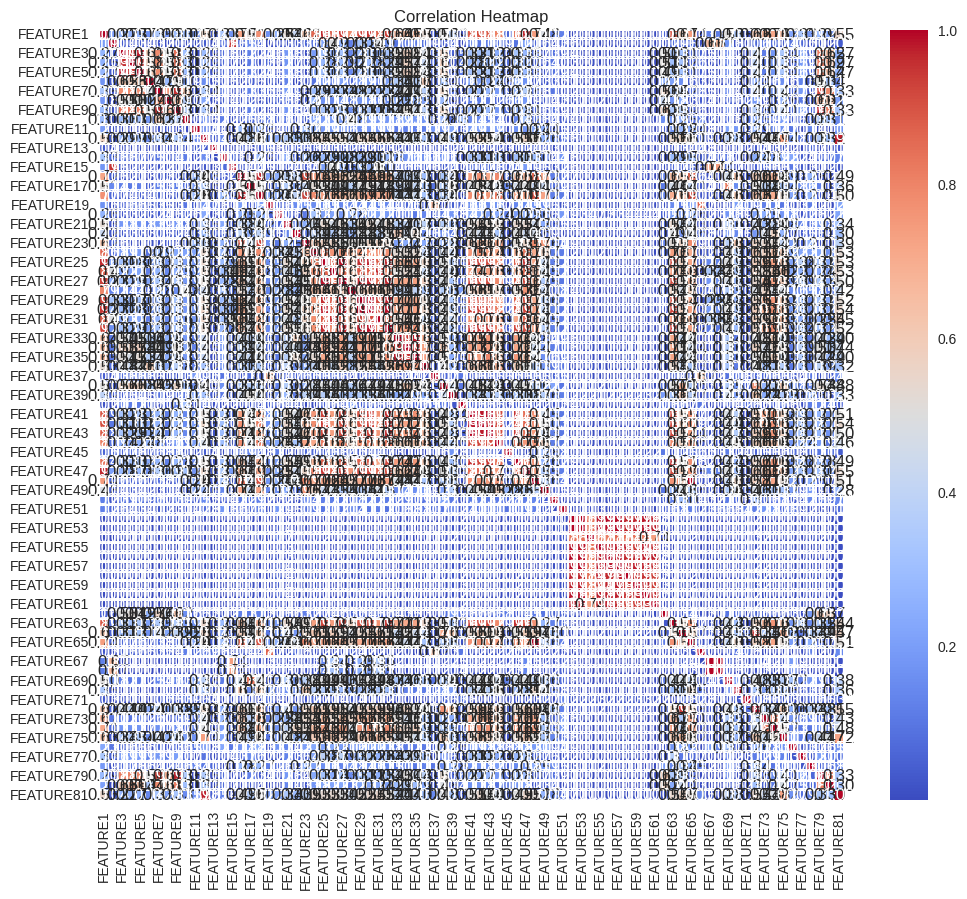

In [ ]:
# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Filter out pairs where Feature 1 is equal to Feature 2
top_correlations_df = top_correlations_df[top_correlations_df['Feature 1'] != top_correlations_df['Feature 2']]

# Display the resulting DataFrame
print("Top Correlated Feature Pairs:")
print(top_correlations_df.head(60))

Top Correlated Feature Pairs:
                     Feature 1  Feature 2  Correlation
FEATURE48 FEATURE65  FEATURE48  FEATURE65     0.998995
FEATURE52 FEATURE53  FEATURE52  FEATURE53     0.997129
FEATURE67 FEATURE68  FEATURE67  FEATURE68     0.996818
FEATURE43 FEATURE41  FEATURE43  FEATURE41     0.995211
FEATURE52 FEATURE56  FEATURE52  FEATURE56     0.994926
FEATURE53 FEATURE57  FEATURE53  FEATURE57     0.994380
FEATURE30 FEATURE29  FEATURE30  FEATURE29     0.992750
FEATURE57 FEATURE52  FEATURE57  FEATURE52     0.992087
FEATURE56 FEATURE53  FEATURE56  FEATURE53     0.991308
FEATURE60 FEATURE53  FEATURE60  FEATURE53     0.988342
FEATURE52 FEATURE55  FEATURE52  FEATURE55     0.986792
FEATURE30 FEATURE32  FEATURE30  FEATURE32     0.986196
FEATURE27 FEATURE25  FEATURE27  FEATURE25     0.985613
FEATURE56 FEATURE57  FEATURE56  FEATURE57     0.985509
FEATURE55 FEATURE53  FEATURE55  FEATURE53     0.983464
FEATURE60 FEATURE52  FEATURE60  FEATURE52     0.983241
FEATURE41 FEATURE42  FEATURE41  FEA

In [ ]:
correlation_matrix.shape

(81, 81)

# 4. Unsupervised

## 4.1

### k-means

In [ ]:
df_4_kmeans = df_copy.copy()

In [ ]:
X = df_4_kmeans

In [443]:
X

,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,FEATURE10,...,FEATURE72,FEATURE73,FEATURE74,FEATURE75,FEATURE76,FEATURE77,FEATURE78,FEATURE79,FEATURE80,FEATURE81
0,-0.414624,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.683471,-0.329882,-0.603371,-0.533083,...,-1.261301,-0.274764,-0.390445,-0.501802,-0.296158,-0.034003,-0.878343,-0.596197,-0.542861,-0.572221
1,-0.411395,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.683471,-0.329882,-0.603371,-0.275166,...,-1.261301,-0.282714,-0.390445,-0.501802,-0.296158,-0.034003,-0.878343,-0.596197,-0.542861,-0.438186
2,-0.388797,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.683471,-0.329882,-0.700488,-0.533083,...,-0.651967,-0.258863,-0.378129,-0.501802,-0.296158,-0.034003,-0.878343,-0.514285,-0.542861,-0.706257
3,21.298996,0.444098,4.110341,5.618017,4.675123,4.259352,3.863831,3.580990,4.349559,0.240670,...,4.588815,15.332191,18.218258,21.807810,1.632692,43.044045,0.157306,4.631729,3.521426,22.347851
4,-0.337144,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.380318,-0.329882,-0.506255,0.240670,...,-0.904863,-0.083950,-0.353498,-0.501802,-0.296158,-0.034003,1.192955,-0.596197,-0.542861,-0.572221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,-0.401710,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.607683,-0.329882,-0.506255,-0.533083,...,-1.261301,-0.282714,-0.390445,-0.501802,-0.296158,-0.034003,-0.878343,-0.596197,-0.542861,-0.706257
2966,-0.262893,-0.073243,0.034108,0.083643,0.334809,0.899537,-0.152953,-0.329882,-0.117790,-0.017248,...,0.153528,-0.258863,-0.267290,0.123701,-0.296158,-0.034003,-0.878343,-0.145680,-0.016773,0.634099
2967,0.150331,-0.073243,0.034108,0.083643,-0.026884,0.899537,-0.152953,-0.329882,-0.117790,-0.275166,...,1.089497,-0.139604,0.003651,0.123701,0.668267,-0.034002,0.157306,-0.048874,-0.112426,0.500063
2968,-0.275806,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.077164,-0.329882,-0.409139,1.014423,...,-0.455805,-0.219110,-0.316552,-0.293301,-0.296158,-0.034003,0.157306,-0.391416,-0.367499,-0.706257


In [ ]:
# Import Special library to find feature importances after kmeans clustering
from kmeans_feature_imp import KMeansInterp

In [446]:
kms = KMeansInterp(
    n_clusters=5,
    ordered_feature_names=X.columns.tolist(),
    feature_importance_method='wcss_min', # or 'unsup2sup'
)
kms_labels_ = kms.fit_predict(X.values)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [447]:
kms.labels_

array([1, 1, 1, ..., 1, 1, 2], dtype=int32)

##### silhouette_score

In [ ]:
silhouette_avg = silhouette_score(X.values, kms.labels_)
silhouette_avg

##### Calinski_score

In [449]:
calinski_index= calinski_harabasz_score(X.values, kms.labels_)
calinski_index

1476.2341053668822

##### Davies_bouldin_score

In [451]:
davies_bouldin_index = davies_bouldin_score(X.values, kms.labels_)
davies_bouldin_index

0.9275362396221098

##### Inertia

In [452]:
distortion_score = kms.inertia_
distortion_score

1407984.1613595632

##### feature_importances_

In [ ]:
kms.feature_importances_ # Features here are words

{0: [('FEATURE24', 2.87429596004089),
  ('FEATURE1', 2.866443490722764),
  ('FEATURE18', 2.841860389428389),
  ('FEATURE31', 2.7982806699813643),
  ('FEATURE26', 2.789413949139161),
  ('FEATURE42', 2.7818470257933274),
  ('FEATURE47', 2.7519606373687755),
  ('FEATURE44', 2.7510131996188614),
  ('FEATURE30', 2.6584426334895457),
  ('FEATURE16', 2.6489313437240294),
  ('FEATURE25', 2.6232215909667165),
  ('FEATURE41', 2.56457576830041),
  ('FEATURE65', 2.560330624146655),
  ('FEATURE48', 2.559637525184282),
  ('FEATURE75', 2.5572933473813357),
  ('FEATURE29', 2.513176889492789),
  ('FEATURE43', 2.507309906495647),
  ('FEATURE32', 2.493302162168872),
  ('FEATURE63', 2.4251346605697006),
  ('FEATURE23', 2.4241727713769388),
  ('FEATURE72', 2.404725434081456),
  ('FEATURE12', 2.3968370988657743),
  ('FEATURE81', 2.372907910059772),
  ('FEATURE46', 2.3386548870612986),
  ('FEATURE64', 2.3241156210361815),
  ('FEATURE27', 2.2987487931597186),
  ('FEATURE28', 2.2255074626242153),
  ('FEATURE34

the sum is not 1:

In [ ]:
# list_sum = []
# sum = 0.0
# for i in range(len(normalized_data)):
#   for j in range(len(normalized_data[0])):
#     sum += normalized_data[0][0][1] + sum
#   list_sum.append(sum)
# print(list_sum)

we adjust data to normalize values to sum 1


In [ ]:
import numpy as np

# Assuming data is previously defined
data = kms.feature_importances_
# Step 1: Extract values
all_values = [value for sublist in data.values() for _, value in sublist]

# Step 2: Calculate the sum for each key
key_sums = {key: np.sum([val for _, val in sublist]) for key, sublist in data.items()}

# Step 3: Normalize the values such that the sum is 1
normalized_data = {key: [(feature, value / key_sums[key]) for feature, value in sublist] for key, sublist in data.items()}

# Print the normalized data
print("Normalized Data:")
for key, sublist in normalized_data.items():
    print(f"Key {key}: {sublist}")

Normalized Data:
Key 0: [('FEATURE24', 0.02585059190733556), ('FEATURE1', 0.025779969054772787), ('FEATURE18', 0.02555887570592762), ('FEATURE31', 0.025166932232282967), ('FEATURE26', 0.025087187492967813), ('FEATURE42', 0.025019132758825384), ('FEATURE47', 0.02475034316948323), ('FEATURE44', 0.024741822186616077), ('FEATURE30', 0.023909269115913533), ('FEATURE16', 0.023823727308925333), ('FEATURE25', 0.023592501180576902), ('FEATURE41', 0.023065057503971278), ('FEATURE65', 0.023026877897336415), ('FEATURE48', 0.02302064436443765), ('FEATURE75', 0.02299956150290055), ('FEATURE29', 0.02260279075794993), ('FEATURE43', 0.02255002479880902), ('FEATURE32', 0.022424043171597397), ('FEATURE63', 0.02181096425081787), ('FEATURE23', 0.02180231329582651), ('FEATURE72', 0.021627409532574974), ('FEATURE12', 0.021556464112436002), ('FEATURE81', 0.02134125186460306), ('FEATURE46', 0.021033190018698536), ('FEATURE64', 0.020902428038070017), ('FEATURE27', 0.020674286077557107), ('FEATURE28', 0.02001557

In [ ]:
# Calculate the sum of values for each key in the normalized data
key_sums2 = {key: np.sum([val for _, val in sublist]) for key, sublist in normalized_data.items()}

# Print the sum of values for each key
print("Sum of Values for Each Key:")
for key, total_sum in key_sums2.items():
    print(f"Key {key}: {total_sum}")


Sum of Values for Each Key:
Key 0: 1.0
Key 1: 1.0
Key 2: 1.0
Key 3: 1.0
Key 4: 1.0000000000000002


#### assighn labels to each data

In [ ]:
labels = kms.labels_
labels

array([0, 2, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
np.unique(labels)

array([0, 1, 2, 3, 4], dtype=int32)

In [ ]:
df['y_pred'] = labels

In [ ]:
df

,Index,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,...,FEATURE74,FEATURE75,FEATURE76,FEATURE77,FEATURE78,FEATURE79,FEATURE80,FEATURE81,Class Label,y_pred
0,1,1.890391,-0.073243,0.034108,0.083643,-0.026884,-0.220401,0.377566,-0.329882,0.270675,...,1.050467,1.374707,-0.296158,-0.034001,0.157306,0.155906,-0.064600,2.644631,0,0
1,2,0.276235,-0.073243,0.034108,0.083643,-0.026884,-0.220401,0.225989,-0.329882,-0.214906,...,0.102175,-0.293301,0.668267,-0.034002,-0.878343,-0.160573,-0.495035,-0.438186,0,2
2,3,-0.414624,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.683471,-0.329882,-0.603371,...,-0.378129,-0.501802,-0.296158,-0.034003,-0.878343,-0.473329,-0.542861,-0.438186,0,1
3,4,-0.411395,-0.073243,0.034108,0.083643,-0.026884,-0.220401,-0.607683,-0.329882,-0.506255,...,3.033261,-0.501802,-0.296158,-0.034003,-0.878343,-0.719065,-1.068949,-0.706257,0,1
4,5,-0.366199,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.228741,-0.329882,-0.506255,...,-0.378129,-0.501802,-0.296158,-0.034003,0.157306,-0.596197,-0.542861,-0.572221,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298169,298170,-0.104706,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.304530,-0.329882,-0.506255,...,-0.230343,-0.501802,-0.296158,-0.034003,0.157306,-0.541589,-0.542861,-0.438186,0,1
298170,298171,-0.375884,-0.073243,0.034108,0.083643,-0.026884,-0.220401,0.225989,1.625554,0.270675,...,-0.365814,-0.501802,-0.296158,-0.034003,-0.878343,0.018145,-0.542861,-0.304150,0,1
298171,298172,-0.069194,0.030225,-0.373515,-0.469795,-0.388577,-0.220401,-0.456106,-0.329882,-0.506255,...,-0.094873,-0.501802,-0.296158,-0.034003,1.192955,-0.511134,-0.542861,-0.572221,0,1
298172,298173,-0.111162,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.607683,-0.329882,-0.603371,...,-0.045611,-0.501802,-0.296158,-0.034002,0.157306,-0.489711,-0.542861,-0.036079,0,1


#### Distribution of each clusters

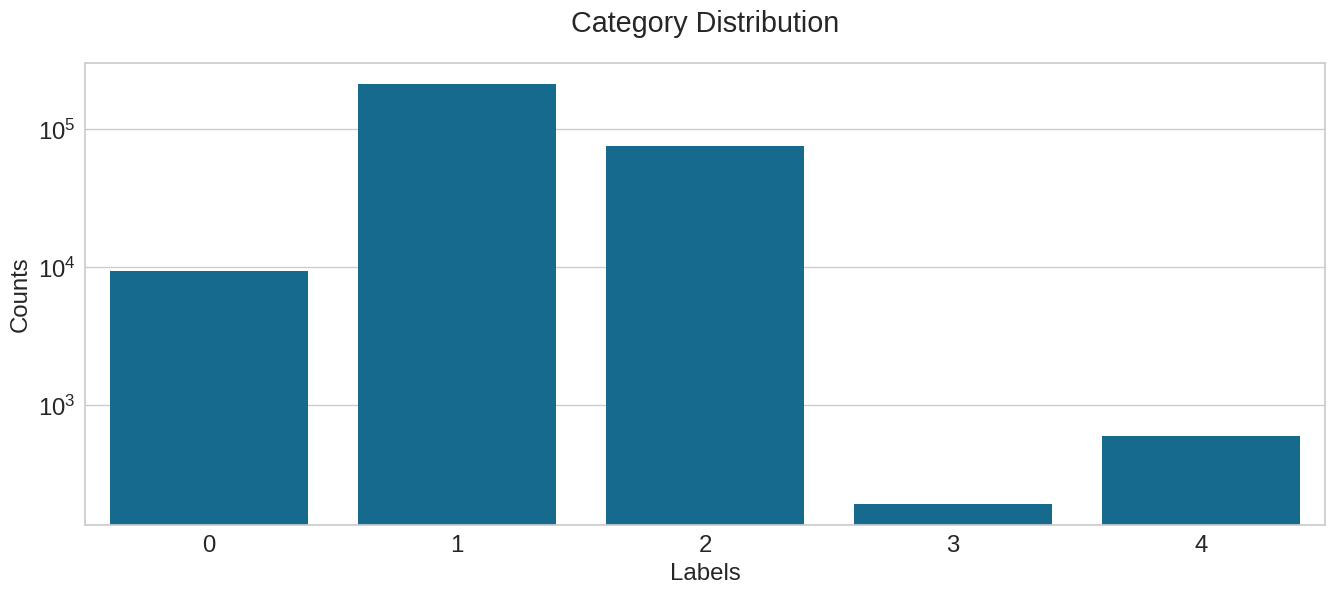

In [ ]:
categories = df['y_pred'].unique().tolist()

category_distrib = df['y_pred'].value_counts()

plt.figure(figsize=(16, 6))
ax = sns.barplot(x=category_distrib.index, y=category_distrib.values)

plt.setp(ax.xaxis.get_label(), fontsize='x-large');
plt.setp(ax.yaxis.get_label(), fontsize='x-large');

ax.set_title("Category Distribution", fontsize="xx-large", y=1.05)
ax.set_xlabel("Labels", fontsize="x-large")
ax.set_ylabel("Counts", fontsize="x-large")
# Set y-axis to log scale
ax.set_yscale('log')


plt.setp(ax.get_xticklabels(), fontsize='x-large');
plt.setp(ax.get_yticklabels(), fontsize='x-large');

### Plot k-means

In [ ]:
def reduce_pca(embedding, n_c):
    pca = PCA(n_components= n_c)
    reduced = pca.fit_transform(embedding)
    print( "pca explained_variance_ ",pca.explained_variance_)
    print( "pca explained_variance_ratio_ ",pca.explained_variance_ratio_)

    return reduced

In [ ]:
X_red = reduce_pca(df.loc[:, 'FEATURE1':'FEATURE81'], 2)

pca explained_variance_  [25.4956717   8.91634262]
pca explained_variance_ratio_  [0.31476138 0.1100783 ]


In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15, 15)})

# colors
palette = sns.hls_palette(9, l=.4, s=.9)
# plot
sns.scatterplot(X_red[:,0], X_red[:,1], hue = labels, legend='full', palette=palette)
plt.title(f'kmeans')
plt.savefig("kmeans.png")
plt.show()

### Plot Highest Weight Features in each Cluster

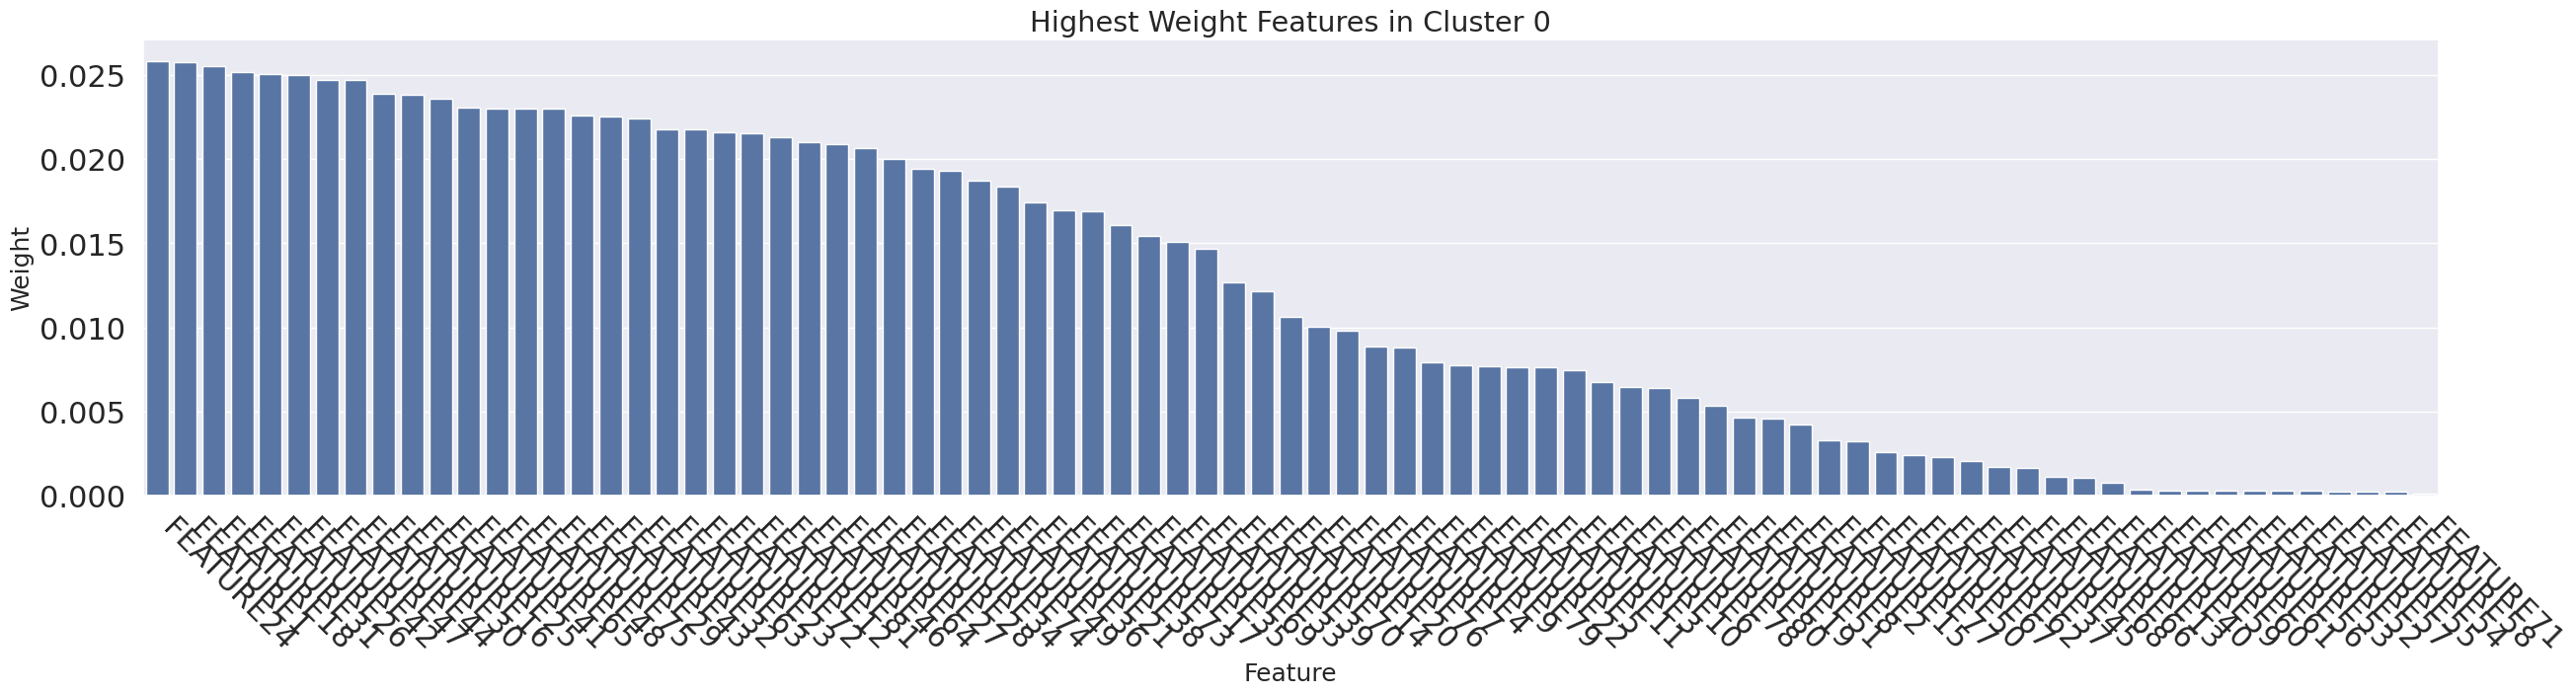

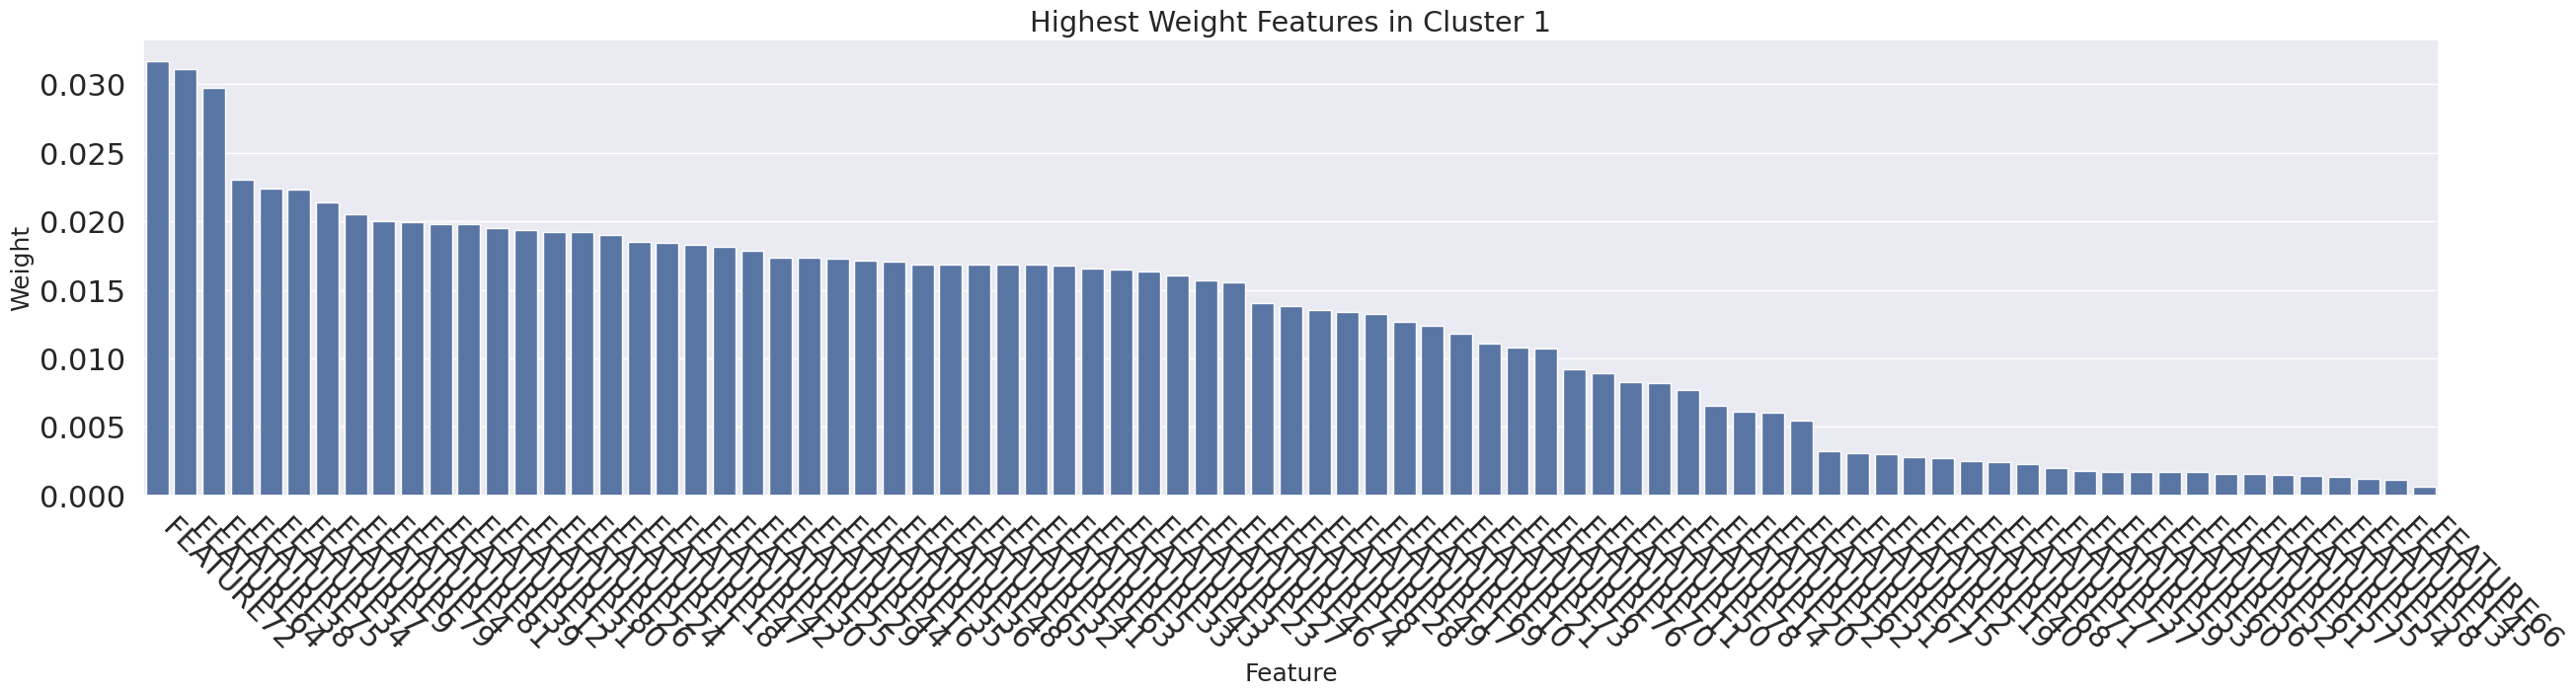

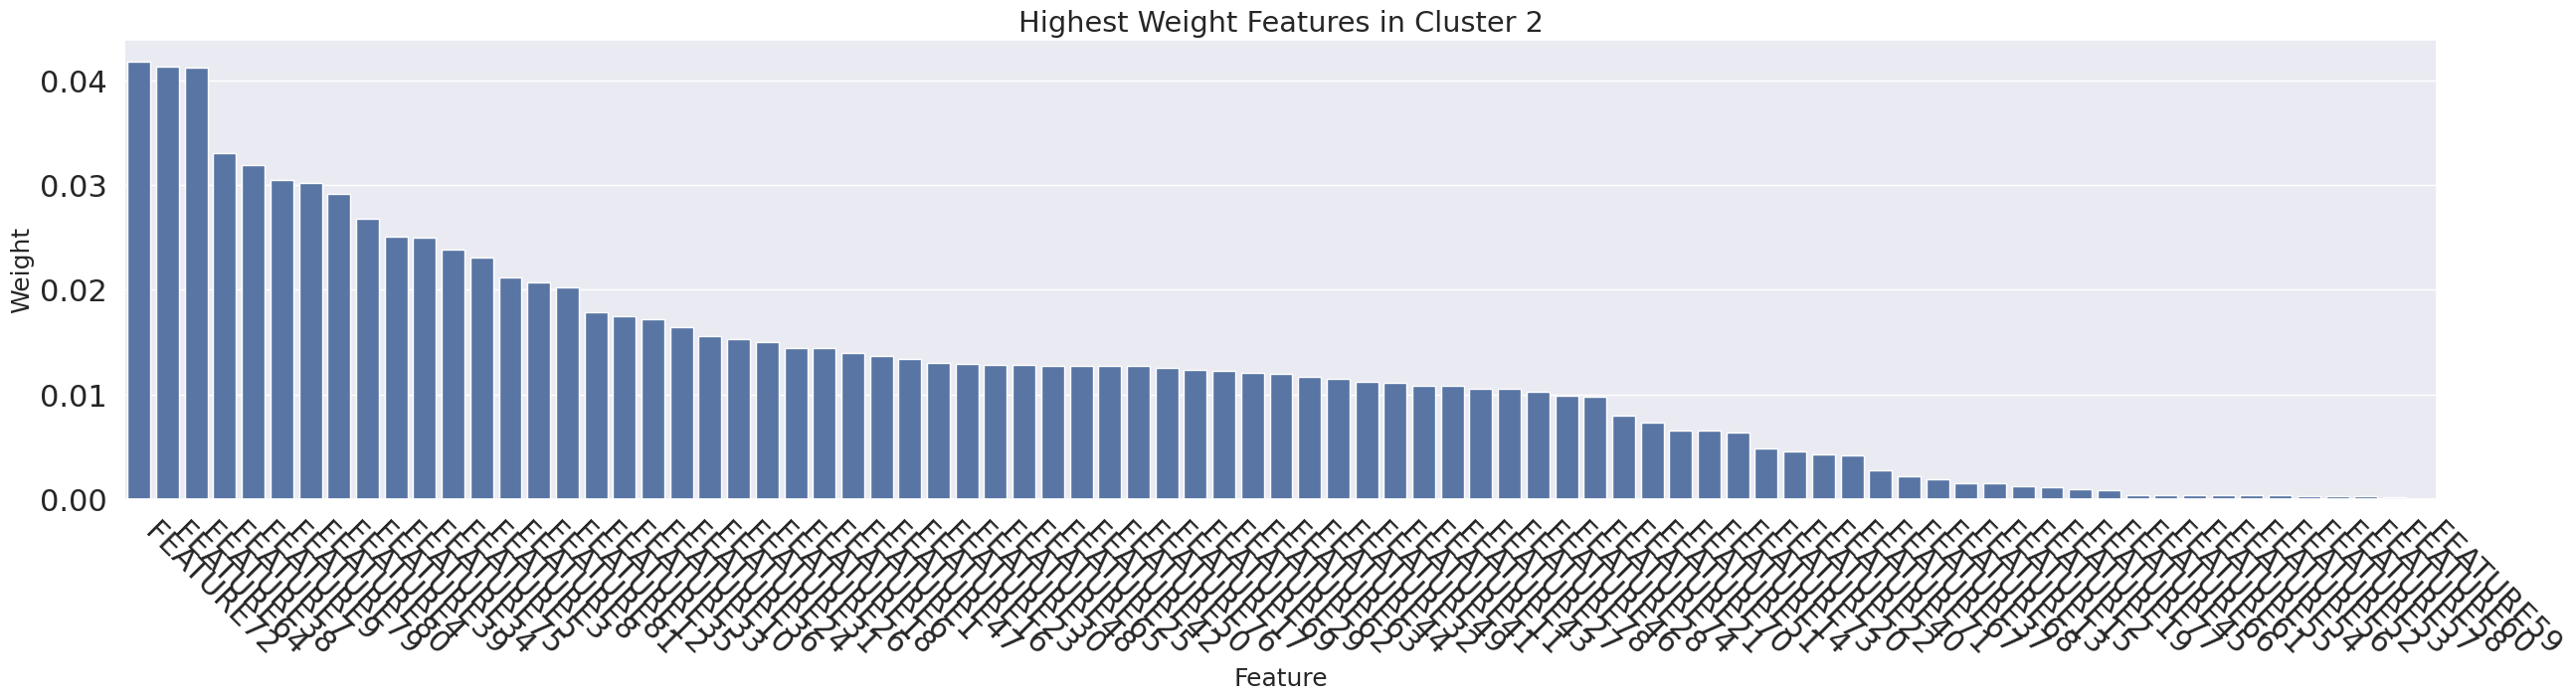

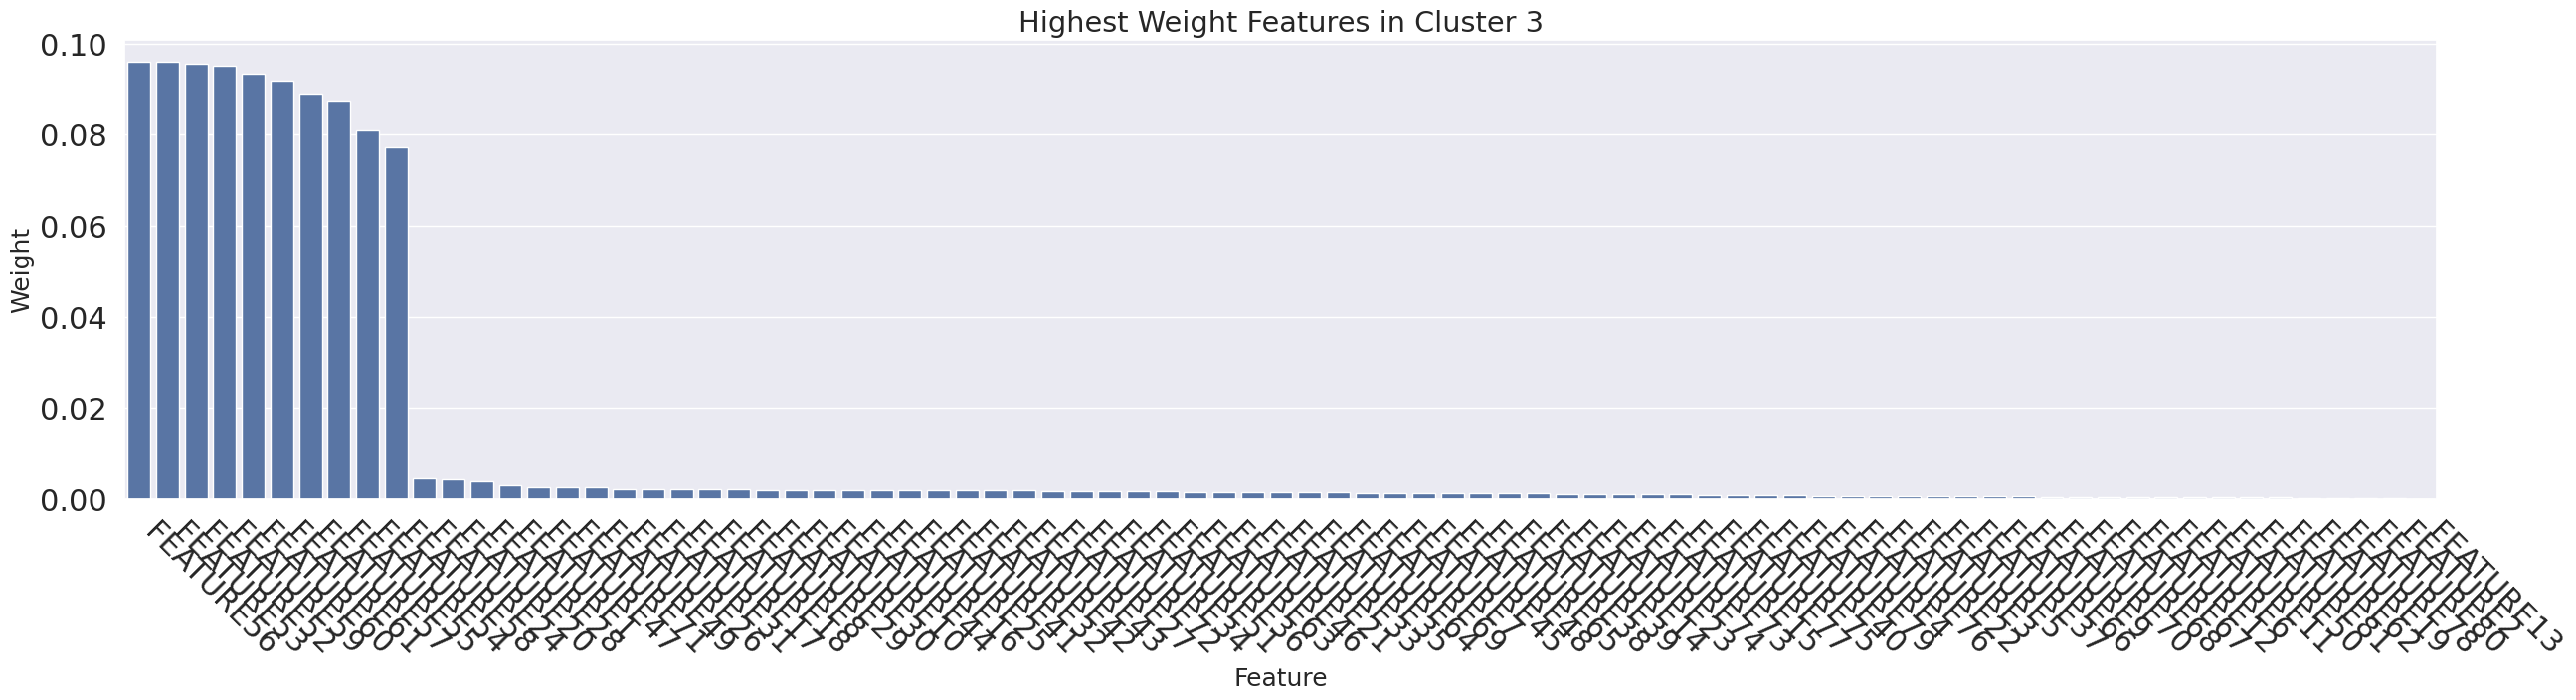

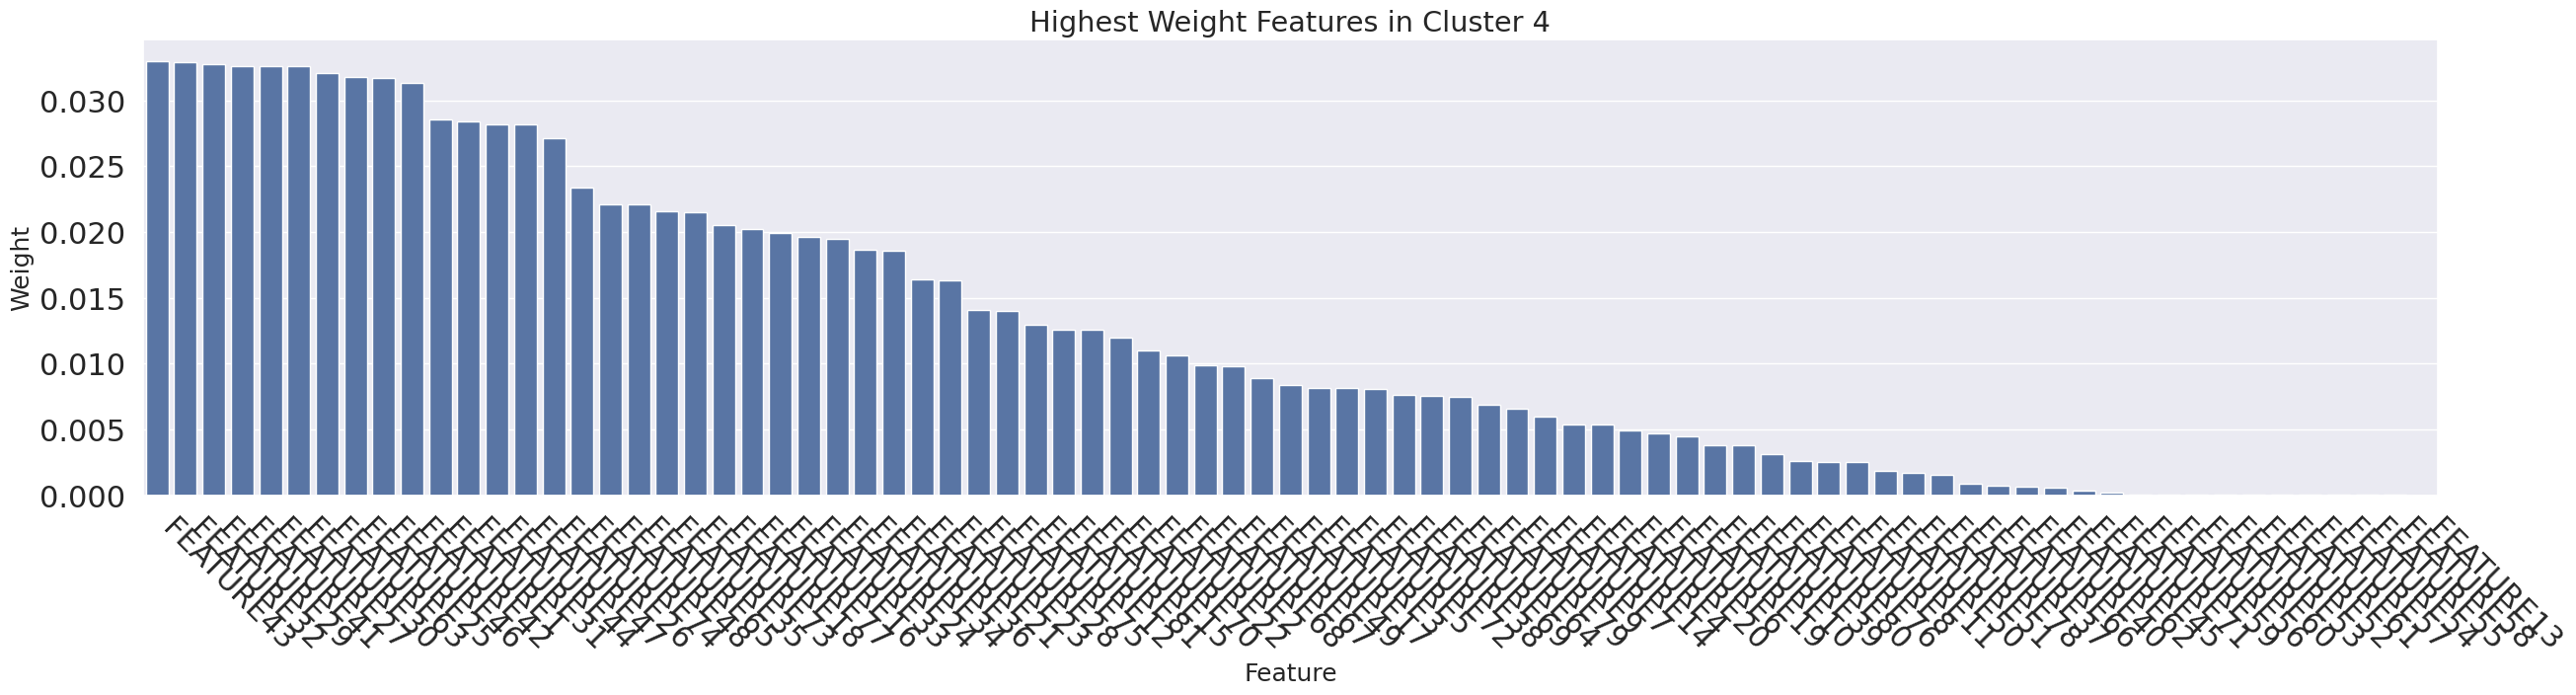

In [ ]:
for labels, feature_weights in normalized_data.items():
    df_feature_weight = pd.DataFrame(feature_weights[:81], columns=["Feature", "Weight"])
    fig, ax = plt.subplots(figsize=(30,6))
    sns.barplot(x="Feature", y="Weight", data=df_feature_weight)
    plt.xticks(rotation=-45, ha="left");
    ax.tick_params(axis='both', which='major', labelsize=22)
    plt.title(f'Highest Weight Features in Cluster {labels}', fontsize='xx-large')
    plt.xlabel('Feature', fontsize=18)
    plt.ylabel('Weight', fontsize=18)

    plt.show();

    print('\n\n')

### List of sorted feature in each cluster

In [ ]:
normalized_data

{0: [('FEATURE24', 0.02585059190733556),
  ('FEATURE1', 0.025779969054772787),
  ('FEATURE18', 0.02555887570592762),
  ('FEATURE31', 0.025166932232282967),
  ('FEATURE26', 0.025087187492967813),
  ('FEATURE42', 0.025019132758825384),
  ('FEATURE47', 0.02475034316948323),
  ('FEATURE44', 0.024741822186616077),
  ('FEATURE30', 0.023909269115913533),
  ('FEATURE16', 0.023823727308925333),
  ('FEATURE25', 0.023592501180576902),
  ('FEATURE41', 0.023065057503971278),
  ('FEATURE65', 0.023026877897336415),
  ('FEATURE48', 0.02302064436443765),
  ('FEATURE75', 0.02299956150290055),
  ('FEATURE29', 0.02260279075794993),
  ('FEATURE43', 0.02255002479880902),
  ('FEATURE32', 0.022424043171597397),
  ('FEATURE63', 0.02181096425081787),
  ('FEATURE23', 0.02180231329582651),
  ('FEATURE72', 0.021627409532574974),
  ('FEATURE12', 0.021556464112436002),
  ('FEATURE81', 0.02134125186460306),
  ('FEATURE46', 0.021033190018698536),
  ('FEATURE64', 0.020902428038070017),
  ('FEATURE27', 0.020674286077557

## 4.2

### Distribution of each clusters(0 and 1)

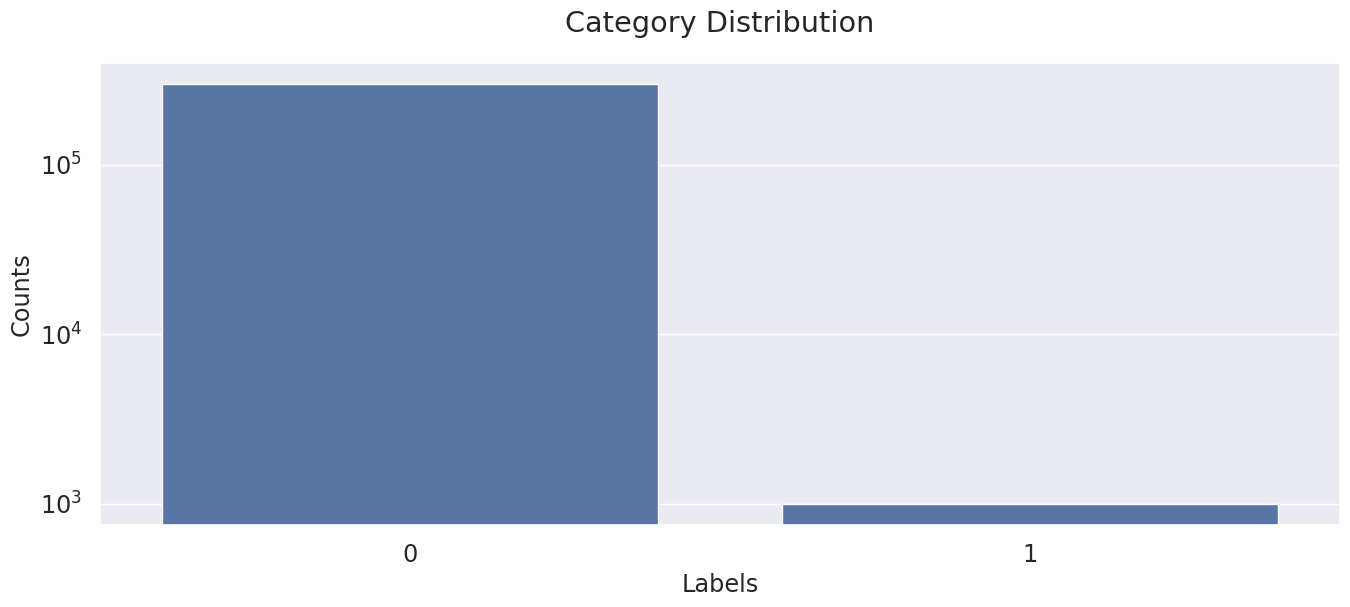

In [ ]:
categories = df['Class Label'].unique().tolist()

category_distrib = df['Class Label'].value_counts()

plt.figure(figsize=(16, 6))
ax = sns.barplot(x=category_distrib.index, y=category_distrib.values)

plt.setp(ax.xaxis.get_label(), fontsize='x-large');
plt.setp(ax.yaxis.get_label(), fontsize='x-large');

ax.set_title("Category Distribution", fontsize="xx-large", y=1.05)
ax.set_xlabel("Labels", fontsize="x-large")
ax.set_ylabel("Counts", fontsize="x-large")
# Set y-axis to log scale
ax.set_yscale('log')


plt.setp(ax.get_xticklabels(), fontsize='x-large');
plt.setp(ax.get_yticklabels(), fontsize='x-large');

### Split each cluster

In [ ]:
df_0=df[(df['Class Label'] == 0)].copy()
df_1=df[(df['Class Label'] == 1)].copy()

In [ ]:
columns_to_remove = ['Index', 'Class Label','y_pred']
df0_copy = df_0.drop(columns=columns_to_remove).copy()
df1_copy = df_1.drop(columns=columns_to_remove).copy()

In [ ]:
df0_copy

,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,FEATURE10,...,FEATURE72,FEATURE73,FEATURE74,FEATURE75,FEATURE76,FEATURE77,FEATURE78,FEATURE79,FEATURE80,FEATURE81
0,1.890391,-0.073243,0.034108,0.083643,-0.026884,-0.220401,0.377566,-0.329882,0.270675,0.240670,...,1.992450,0.210221,1.050467,1.374707,-0.296158,-0.034001,0.157306,0.155906,-0.064600,2.644631
1,0.276235,-0.073243,0.034108,0.083643,-0.026884,-0.220401,0.225989,-0.329882,-0.214906,1.014423,...,0.923138,0.043259,0.102175,-0.293301,0.668267,-0.034002,-0.878343,-0.160573,-0.495035,-0.438186
2,-0.414624,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.683471,-0.329882,-0.603371,-0.533083,...,-1.261301,-0.282714,-0.378129,-0.501802,-0.296158,-0.034003,-0.878343,-0.473329,-0.542861,-0.438186
3,-0.411395,-0.073243,0.034108,0.083643,-0.026884,-0.220401,-0.607683,-0.329882,-0.506255,-0.533083,...,-1.870634,1.665174,3.033261,-0.501802,-0.296158,-0.034003,-0.878343,-0.719065,-1.068949,-0.706257
4,-0.366199,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.228741,-0.329882,-0.506255,0.756505,...,-1.261301,-0.266813,-0.378129,-0.501802,-0.296158,-0.034003,0.157306,-0.596197,-0.542861,-0.572221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298169,-0.104706,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.304530,-0.329882,-0.506255,0.240670,...,0.237314,-0.179357,-0.230343,-0.501802,-0.296158,-0.034003,0.157306,-0.541589,-0.542861,-0.438186
298170,-0.375884,-0.073243,0.034108,0.083643,-0.026884,-0.220401,0.225989,1.625554,0.270675,-0.533083,...,-0.904863,-0.258863,-0.365814,-0.501802,-0.296158,-0.034003,-0.878343,0.018145,-0.542861,-0.304150
298171,-0.069194,0.030225,-0.373515,-0.469795,-0.388577,-0.220401,-0.456106,-0.329882,-0.506255,-0.275166,...,0.449315,-0.052148,-0.094873,-0.501802,-0.296158,-0.034003,1.192955,-0.511134,-0.542861,-0.572221
298172,-0.111162,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.607683,-0.329882,-0.603371,-0.533083,...,0.566700,0.027358,-0.045611,-0.501802,-0.296158,-0.034002,0.157306,-0.489711,-0.542861,-0.036079


In [ ]:
df1_copy

,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,FEATURE10,...,FEATURE72,FEATURE73,FEATURE74,FEATURE75,FEATURE76,FEATURE77,FEATURE78,FEATURE79,FEATURE80,FEATURE81
82,5.096103,-0.073243,4.517965,6.171455,3.951737,-0.220401,7.122731,0.321930,8.039978,2.561929,...,2.795772,1.021178,1.826343,2.000211,0.668267,17.383871,-0.878343,5.784764,2.789029,-0.170115
533,19.675156,0.030225,3.702718,5.064580,3.590044,3.139413,5.455386,2.277366,6.000536,1.788176,...,3.935968,3.175780,7.602307,8.046741,1.632692,30.857965,0.157306,5.602298,4.055873,5.727448
1099,3.191400,-0.073243,0.849355,1.190518,0.696501,0.899537,1.362815,0.973742,1.533187,-0.017248,...,2.551536,1.164288,4.018500,11.799760,1.632692,-0.033996,0.157306,1.920742,1.960042,8.274123
1364,9.641565,-0.073243,4.110341,4.511143,4.675123,9.859043,2.575428,0.973742,2.892815,0.756505,...,4.035933,3.732320,3.833768,2.208712,-0.296158,-0.033837,2.228604,3.189092,1.682895,1.438312
1392,18.887448,1.892653,5.333211,4.511143,5.036816,0.899537,5.985905,0.321930,6.680350,2.561929,...,3.273935,12.605148,12.343770,6.795735,-0.296158,0.015226,1.192955,3.933904,3.986070,5.459377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296911,13.544593,1.375312,0.849355,0.637080,1.058194,0.899537,0.680719,0.321930,0.853373,-0.275166,...,4.256388,10.410792,12.651657,14.510273,-0.296158,0.625185,0.157306,1.064134,0.374350,14.037650
297208,11.065250,28.070114,1.256978,0.637080,1.058194,-0.220401,1.287026,-0.329882,0.756257,2.304011,...,1.652143,4.972608,-0.082557,-0.501802,-0.296158,-0.034000,-0.878343,0.902796,-0.174600,-0.304150
297289,21.186005,3.237740,0.849355,0.637080,0.696501,-0.220401,0.529142,-0.329882,0.756257,-0.017248,...,4.569934,56.150379,54.339584,3.251217,0.668267,-0.033840,0.157306,0.890890,-0.284337,4.655164
297504,7.052460,0.444098,-0.373515,-0.469795,-0.388577,-0.220401,-0.228741,-0.329882,-0.409139,0.240670,...,0.313804,-0.131654,-0.193397,-0.293301,1.632692,-0.034003,0.157306,-0.385566,-0.317395,0.097956


#### cluster **0**

df0_copy

In [460]:
df

,Index,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,...,FEATURE74,FEATURE75,FEATURE76,FEATURE77,FEATURE78,FEATURE79,FEATURE80,FEATURE81,Class Label,y_pred
0,1,1.890391,-0.073243,0.034108,0.083643,-0.026884,-0.220401,0.377566,-0.329882,0.270675,...,1.050467,1.374707,-0.296158,-0.034001,0.157306,0.155906,-0.064600,2.644631,0,0
1,2,0.276235,-0.073243,0.034108,0.083643,-0.026884,-0.220401,0.225989,-0.329882,-0.214906,...,0.102175,-0.293301,0.668267,-0.034002,-0.878343,-0.160573,-0.495035,-0.438186,0,2
2,3,-0.414624,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.683471,-0.329882,-0.603371,...,-0.378129,-0.501802,-0.296158,-0.034003,-0.878343,-0.473329,-0.542861,-0.438186,0,1
3,4,-0.411395,-0.073243,0.034108,0.083643,-0.026884,-0.220401,-0.607683,-0.329882,-0.506255,...,3.033261,-0.501802,-0.296158,-0.034003,-0.878343,-0.719065,-1.068949,-0.706257,0,1
4,5,-0.366199,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.228741,-0.329882,-0.506255,...,-0.378129,-0.501802,-0.296158,-0.034003,0.157306,-0.596197,-0.542861,-0.572221,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298169,298170,-0.104706,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.304530,-0.329882,-0.506255,...,-0.230343,-0.501802,-0.296158,-0.034003,0.157306,-0.541589,-0.542861,-0.438186,0,1
298170,298171,-0.375884,-0.073243,0.034108,0.083643,-0.026884,-0.220401,0.225989,1.625554,0.270675,...,-0.365814,-0.501802,-0.296158,-0.034003,-0.878343,0.018145,-0.542861,-0.304150,0,1
298171,298172,-0.069194,0.030225,-0.373515,-0.469795,-0.388577,-0.220401,-0.456106,-0.329882,-0.506255,...,-0.094873,-0.501802,-0.296158,-0.034003,1.192955,-0.511134,-0.542861,-0.572221,0,1
298172,298173,-0.111162,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.607683,-0.329882,-0.603371,...,-0.045611,-0.501802,-0.296158,-0.034002,0.157306,-0.489711,-0.542861,-0.036079,0,1


In [455]:
kms = KMeansInterp(
    n_clusters=1,
    ordered_feature_names=df0_copy.columns.tolist(),
    feature_importance_method='wcss_min', # or 'unsup2sup'
)
kms_labels_ = kms.fit_predict(df0_copy.values)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
import numpy as np

def normalize_feature_importances(data):
    """
    Normalize feature importances such that the sum for each key is 1.

    Parameters:
    - data: Dictionary containing feature importances for each key.

    Returns:
    - normalized_data: Dictionary containing normalized feature importances for each key.
    """

    # Step 1: Extract values
    all_values = [value for sublist in data.values() for _, value in sublist]

    # Step 2: Calculate the sum for each key
    key_sums = {key: np.sum([val for _, val in sublist]) for key, sublist in data.items()}

    # Step 3: Normalize the values such that the sum is 1
    normalized_data = {key: [(feature, value / key_sums[key]) for feature, value in sublist] for key, sublist in data.items()}

    return normalized_data

In [ ]:
# Assuming 'kms.feature_importances_' is a dictionary containing feature importances
normalized_data = normalize_feature_importances(kms.feature_importances_)
# Print the normalized data
print("Normalized Data:")
for key, sublist in normalized_data.items():
    print(f"cluster 0: {sublist}")


Normalized Data:
cluster 0: [('FEATURE32', 0.032009402238555126), ('FEATURE1', 0.031889758419799914), ('FEATURE30', 0.031750801358231384), ('FEATURE29', 0.03149239937556252), ('FEATURE25', 0.03139933334085047), ('FEATURE47', 0.03130890811506284), ('FEATURE63', 0.030912005128738564), ('FEATURE43', 0.030680278994665553), ('FEATURE27', 0.030514563648668933), ('FEATURE41', 0.03034717289768014), ('FEATURE42', 0.030322693041869204), ('FEATURE46', 0.02913183007043343), ('FEATURE31', 0.027913309413012285), ('FEATURE26', 0.027175686677741846), ('FEATURE24', 0.02611069816073821), ('FEATURE44', 0.025166580736911217), ('FEATURE74', 0.02328330992767812), ('FEATURE28', 0.02285715782498684), ('FEATURE73', 0.02171491394592473), ('FEATURE65', 0.020707228545844503), ('FEATURE48', 0.020665054678149986), ('FEATURE18', 0.020567824634072814), ('FEATURE16', 0.01976432749353431), ('FEATURE34', 0.01892768549838789), ('FEATURE21', 0.01813917008366341), ('FEATURE35', 0.01802806082100309), ('FEATURE75', 0.0169493

In [ ]:
normalized_data.items()

dict_items([(0, [('FEATURE32', 0.032009402238555126), ('FEATURE1', 0.031889758419799914), ('FEATURE30', 0.031750801358231384), ('FEATURE29', 0.03149239937556252), ('FEATURE25', 0.03139933334085047), ('FEATURE47', 0.03130890811506284), ('FEATURE63', 0.030912005128738564), ('FEATURE43', 0.030680278994665553), ('FEATURE27', 0.030514563648668933), ('FEATURE41', 0.03034717289768014), ('FEATURE42', 0.030322693041869204), ('FEATURE46', 0.02913183007043343), ('FEATURE31', 0.027913309413012285), ('FEATURE26', 0.027175686677741846), ('FEATURE24', 0.02611069816073821), ('FEATURE44', 0.025166580736911217), ('FEATURE74', 0.02328330992767812), ('FEATURE28', 0.02285715782498684), ('FEATURE73', 0.02171491394592473), ('FEATURE65', 0.020707228545844503), ('FEATURE48', 0.020665054678149986), ('FEATURE18', 0.020567824634072814), ('FEATURE16', 0.01976432749353431), ('FEATURE34', 0.01892768549838789), ('FEATURE21', 0.01813917008366341), ('FEATURE35', 0.01802806082100309), ('FEATURE75', 0.01694931479592738),

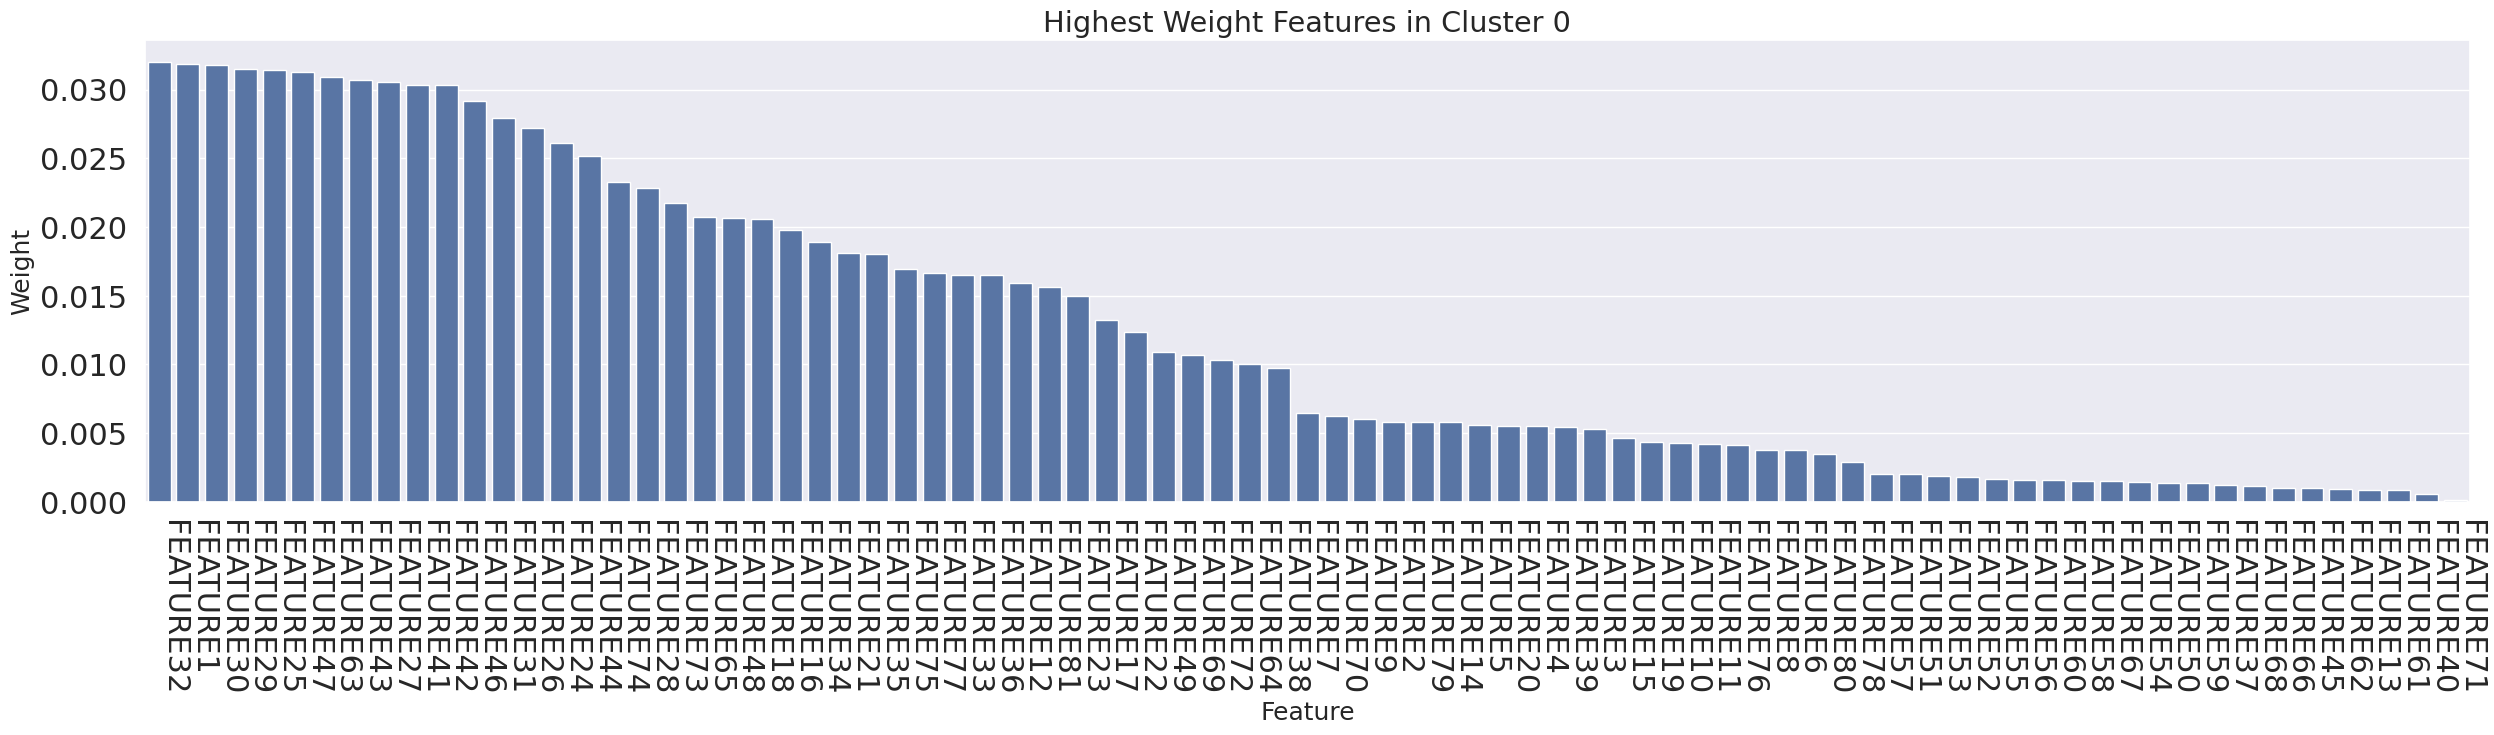

In [ ]:
for labels, feature_weights in normalized_data.items():
    df_feature_weight = pd.DataFrame(feature_weights[:81], columns=["Feature", "Weight"])
    fig, ax = plt.subplots(figsize=(30,6))
    sns.barplot(x="Feature", y="Weight", data=df_feature_weight)
    plt.xticks(rotation=-90, ha="left");
    ax.tick_params(axis='both', which='major', labelsize=22)
    plt.title(f'Highest Weight Features in Cluster 0', fontsize='xx-large')
    plt.xlabel('Feature', fontsize=18)
    plt.ylabel('Weight', fontsize=18)

    plt.show();

    print('\n\n')

In [ ]:
list_42_0 = normalized_data[0][:81]

##### Show list

In [ ]:
list_42_0

[('FEATURE32', 0.032009402238555126),
 ('FEATURE1', 0.031889758419799914),
 ('FEATURE30', 0.031750801358231384),
 ('FEATURE29', 0.03149239937556252),
 ('FEATURE25', 0.03139933334085047),
 ('FEATURE47', 0.03130890811506284),
 ('FEATURE63', 0.030912005128738564),
 ('FEATURE43', 0.030680278994665553),
 ('FEATURE27', 0.030514563648668933),
 ('FEATURE41', 0.03034717289768014),
 ('FEATURE42', 0.030322693041869204),
 ('FEATURE46', 0.02913183007043343),
 ('FEATURE31', 0.027913309413012285),
 ('FEATURE26', 0.027175686677741846),
 ('FEATURE24', 0.02611069816073821),
 ('FEATURE44', 0.025166580736911217),
 ('FEATURE74', 0.02328330992767812),
 ('FEATURE28', 0.02285715782498684),
 ('FEATURE73', 0.02171491394592473),
 ('FEATURE65', 0.020707228545844503),
 ('FEATURE48', 0.020665054678149986),
 ('FEATURE18', 0.020567824634072814),
 ('FEATURE16', 0.01976432749353431),
 ('FEATURE34', 0.01892768549838789),
 ('FEATURE21', 0.01813917008366341),
 ('FEATURE35', 0.01802806082100309),
 ('FEATURE75', 0.016949314

#### **cluster 1**

df1_copy

In [ ]:
kms = KMeansInterp(
    n_clusters=1,
    ordered_feature_names=df1_copy.columns.tolist(),
    feature_importance_method='wcss_min', # or 'unsup2sup'
).fit(df1_copy.values)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Assuming 'kms.feature_importances_' is a dictionary containing feature importances
normalized_data = normalize_feature_importances(kms.feature_importances_)
# Print the normalized data
print("Normalized Data:")
for key, sublist in normalized_data.items():
    print(f"cluster 1: {sublist}")


Normalized Data:
cluster 1: [('FEATURE32', 0.03200940223855573), ('FEATURE1', 0.03188975841980004), ('FEATURE30', 0.03175080135823231), ('FEATURE29', 0.031492399375562447), ('FEATURE25', 0.031399333340850544), ('FEATURE47', 0.03130890811506304), ('FEATURE63', 0.030912005128738776), ('FEATURE43', 0.030680278994665446), ('FEATURE27', 0.030514563648668905), ('FEATURE41', 0.030347172897679717), ('FEATURE42', 0.030322693041869703), ('FEATURE46', 0.0291318300704338), ('FEATURE31', 0.027913309413012077), ('FEATURE26', 0.02717568667774185), ('FEATURE24', 0.026110698160737637), ('FEATURE44', 0.025166580736911325), ('FEATURE74', 0.023283309927678398), ('FEATURE28', 0.022857157824987276), ('FEATURE73', 0.02171491394592464), ('FEATURE65', 0.020707228545845145), ('FEATURE48', 0.020665054678148966), ('FEATURE18', 0.020567824634074073), ('FEATURE16', 0.019764327493534902), ('FEATURE34', 0.018927685498387335), ('FEATURE21', 0.018139170083661817), ('FEATURE35', 0.018028060821002872), ('FEATURE75', 0.01

In [ ]:
normalized_data.items()

dict_items([(0, [('FEATURE32', 0.03200940223855573), ('FEATURE1', 0.03188975841980004), ('FEATURE30', 0.03175080135823231), ('FEATURE29', 0.031492399375562447), ('FEATURE25', 0.031399333340850544), ('FEATURE47', 0.03130890811506304), ('FEATURE63', 0.030912005128738776), ('FEATURE43', 0.030680278994665446), ('FEATURE27', 0.030514563648668905), ('FEATURE41', 0.030347172897679717), ('FEATURE42', 0.030322693041869703), ('FEATURE46', 0.0291318300704338), ('FEATURE31', 0.027913309413012077), ('FEATURE26', 0.02717568667774185), ('FEATURE24', 0.026110698160737637), ('FEATURE44', 0.025166580736911325), ('FEATURE74', 0.023283309927678398), ('FEATURE28', 0.022857157824987276), ('FEATURE73', 0.02171491394592464), ('FEATURE65', 0.020707228545845145), ('FEATURE48', 0.020665054678148966), ('FEATURE18', 0.020567824634074073), ('FEATURE16', 0.019764327493534902), ('FEATURE34', 0.018927685498387335), ('FEATURE21', 0.018139170083661817), ('FEATURE35', 0.018028060821002872), ('FEATURE75', 0.01694931479592

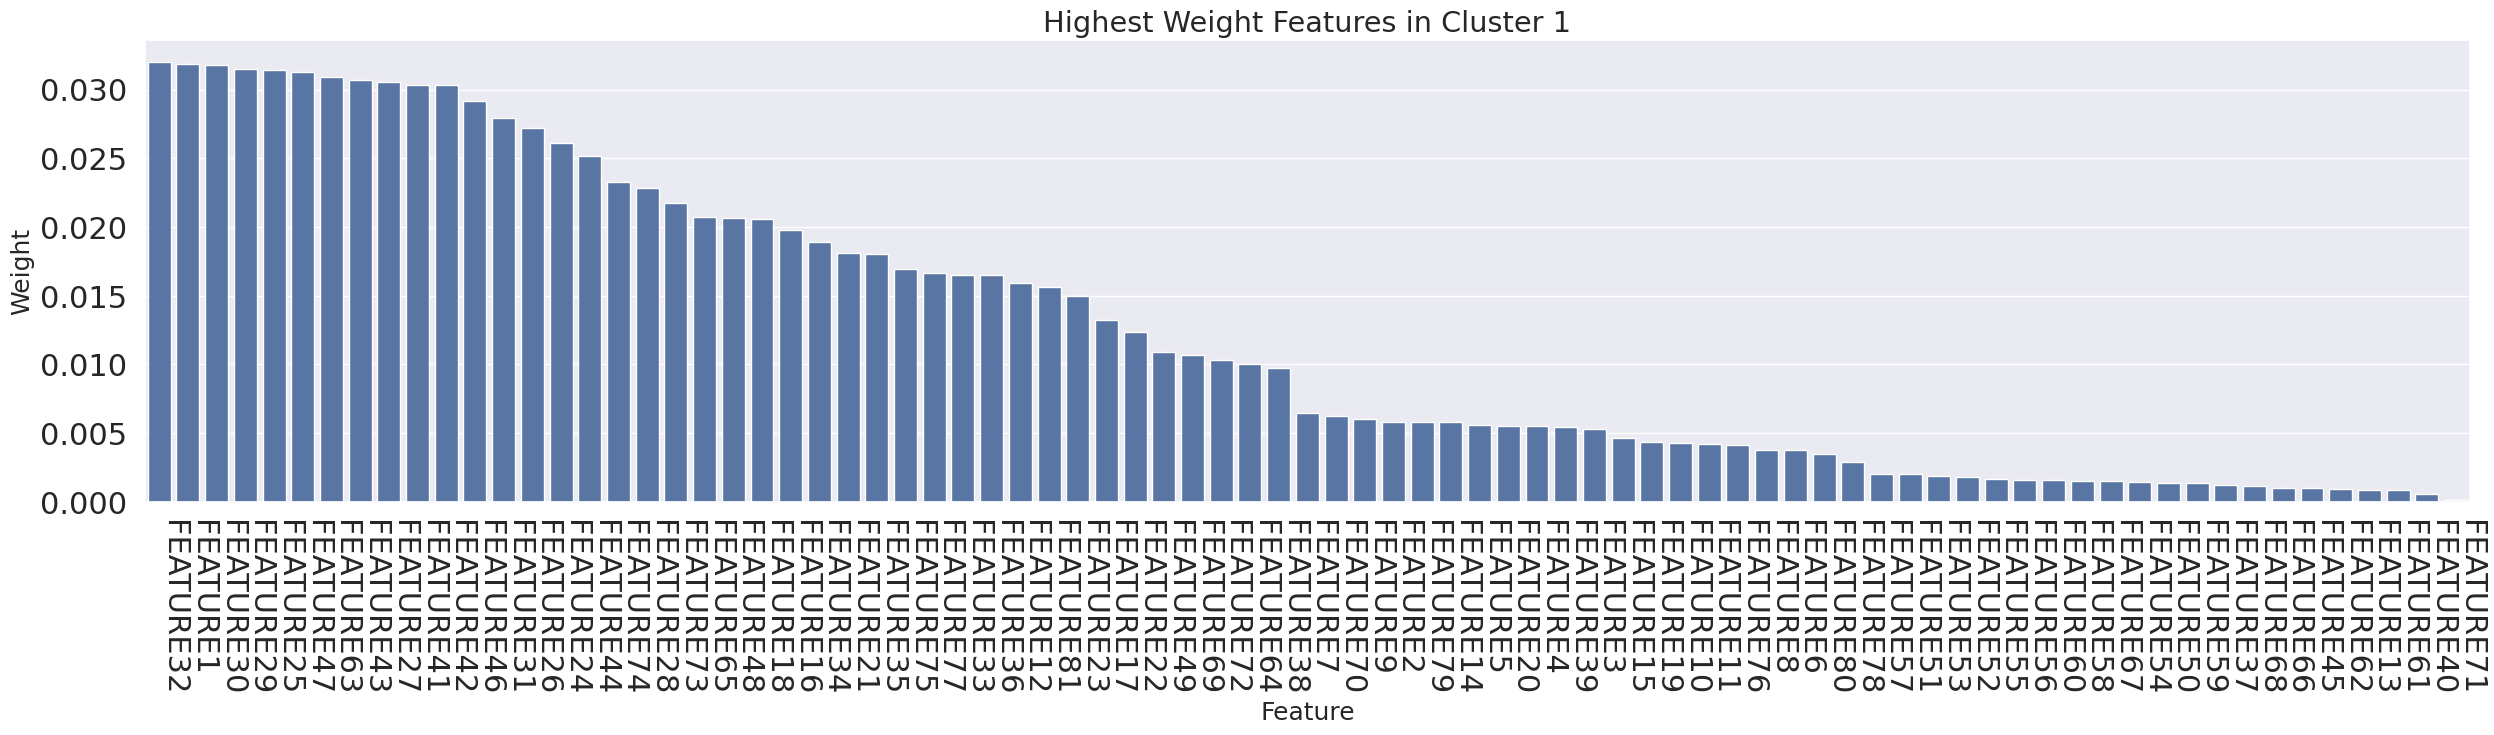

In [ ]:
for labels, feature_weights in normalized_data.items():
    df_feature_weight = pd.DataFrame(feature_weights[:81], columns=["Feature", "Weight"])
    fig, ax = plt.subplots(figsize=(30,6))
    sns.barplot(x="Feature", y="Weight", data=df_feature_weight)
    plt.xticks(rotation=-90, ha="left");
    ax.tick_params(axis='both', which='major', labelsize=22)
    plt.title(f'Highest Weight Features in Cluster 1', fontsize='xx-large')
    plt.xlabel('Feature', fontsize=18)
    plt.ylabel('Weight', fontsize=18)

    plt.show();

    print('\n\n')

In [ ]:
list_42_1 = normalized_data[0][:81]

##### Show list

In [ ]:
list_42_1

[('FEATURE32', 0.03200940223855573),
 ('FEATURE1', 0.03188975841980004),
 ('FEATURE30', 0.03175080135823231),
 ('FEATURE29', 0.031492399375562447),
 ('FEATURE25', 0.031399333340850544),
 ('FEATURE47', 0.03130890811506304),
 ('FEATURE63', 0.030912005128738776),
 ('FEATURE43', 0.030680278994665446),
 ('FEATURE27', 0.030514563648668905),
 ('FEATURE41', 0.030347172897679717),
 ('FEATURE42', 0.030322693041869703),
 ('FEATURE46', 0.0291318300704338),
 ('FEATURE31', 0.027913309413012077),
 ('FEATURE26', 0.02717568667774185),
 ('FEATURE24', 0.026110698160737637),
 ('FEATURE44', 0.025166580736911325),
 ('FEATURE74', 0.023283309927678398),
 ('FEATURE28', 0.022857157824987276),
 ('FEATURE73', 0.02171491394592464),
 ('FEATURE65', 0.020707228545845145),
 ('FEATURE48', 0.020665054678148966),
 ('FEATURE18', 0.020567824634074073),
 ('FEATURE16', 0.019764327493534902),
 ('FEATURE34', 0.018927685498387335),
 ('FEATURE21', 0.018139170083661817),
 ('FEATURE35', 0.018028060821002872),
 ('FEATURE75', 0.0169

##### silhouette_score

In [462]:
columns_to_remove = ['Index', 'Class Label','y_pred']
df_c = df.drop(columns=columns_to_remove).copy()

In [1]:
silhouette_avg = silhouette_score(df_c.values, df['Class Label'])
silhouette_avg

NameError: name 'silhouette_score' is not defined

##### Calinski_score

In [464]:
calinski_index= calinski_harabasz_score(df_c.values, df['Class Label'])
calinski_index

29115.91456370056

##### Davies_bouldin_score

In [465]:
davies_bouldin_index = davies_bouldin_score(df_c.values, df['Class Label'])
davies_bouldin_index

1.0009469959407176

##### Inertia

In [466]:
distortion_score = kms.inertia_
distortion_score

19337199.69592669

## Other

In [ ]:
def find_best_k_silhouette(X, k_range=(2, 13), random_state=42):
    """
    Find the optimal number of clusters (k) using silhouette score.

    Parameters:
    - X: Input data for clustering.
    - k_range: Range of values for k (default is (2, 13)).
    - random_state: Random seed for reproducibility (default is 42).

    Returns:
    - best_k: The optimal number of clusters based on silhouette score.
    """
    silhouette_scores = []

    for kv in range(*k_range):
        kmeans = KMeans(n_clusters=kv,init='k-means++', random_state=random_state)
        labels = kmeans.fit_predict(X)
        silhouette_avg = silhouette_score(X, labels)
        silhouette_scores.append(silhouette_avg)

    best_k = k_range[0] + np.argmax(silhouette_scores)

    print(f"Best k: {best_k}")
    return best_k, silhouette_scores

best_k, silhouette_scores = find_best_k_silhouette(df_4_kmeans, k_range=(2, 13), random_state=42)

In [ ]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(df_4_kmeans)
df['y'] = y_pred

In [ ]:

# Visualize the clustering result (for 2D plot, choose two features)
plt.scatter(df['FEATURE1'], df['FEATURE2'], c=df['Cluster'], cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('FEATURE1')
plt.ylabel('FEATURE2')
plt.show()


In [ ]:
# Check for 'None' values in the entire range of columns
none_values_features = df[feature_columns.applymap(lambda x: x is None).any(axis=1)]


In [ ]:
none_values_features

,Index,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,...,FEATURE73,FEATURE74,FEATURE75,FEATURE76,FEATURE77,FEATURE78,FEATURE79,FEATURE80,FEATURE81,Class Label


In [ ]:
import pandas as pd

# Assuming df is your DataFrame

# Check for NaN values in the entire DataFrame
nan_values_df = df[df.isna().any(axis=1)]

# Display the rows with NaN values
print("Rows with NaN values in the DataFrame:")
print(nan_values_df)


Rows with NaN values in the DataFrame:
Empty DataFrame
Columns: [Index, FEATURE1, FEATURE2, FEATURE3, FEATURE4, FEATURE5, FEATURE6, FEATURE7, FEATURE8, FEATURE9, FEATURE10, FEATURE11, FEATURE12, FEATURE13, FEATURE14, FEATURE15, FEATURE16, FEATURE17, FEATURE18, FEATURE19, FEATURE20, FEATURE21, FEATURE22, FEATURE23, FEATURE24, FEATURE25, FEATURE26, FEATURE27, FEATURE28, FEATURE29, FEATURE30, FEATURE31, FEATURE32, FEATURE33, FEATURE34, FEATURE35, FEATURE36, FEATURE37, FEATURE38, FEATURE39, FEATURE40, FEATURE41, FEATURE42, FEATURE43, FEATURE44, FEATURE45, FEATURE46, FEATURE47, FEATURE48, FEATURE49, FEATURE50, FEATURE51, FEATURE52, FEATURE53, FEATURE54, FEATURE55, FEATURE56, FEATURE57, FEATURE58, FEATURE59, FEATURE60, FEATURE61, FEATURE62, FEATURE63, FEATURE64, FEATURE65, FEATURE66, FEATURE67, FEATURE68, FEATURE69, FEATURE70, FEATURE71, FEATURE72, FEATURE73, FEATURE74, FEATURE75, FEATURE76, FEATURE77, FEATURE78, FEATURE79, FEATURE80, FEATURE81, Class Label]
Index: []

[0 rows x 83 columns]


In [ ]:
# Check for None values in the entire DataFrame
none_values_df = df[df.applymap(lambda x: x is None).any(axis=1)]

# Display the rows with None values
print("Rows with None values in the DataFrame:")
print(none_values_df)


Rows with None values in the DataFrame:
Empty DataFrame
Columns: [Index, FEATURE1, FEATURE2, FEATURE3, FEATURE4, FEATURE5, FEATURE6, FEATURE7, FEATURE8, FEATURE9, FEATURE10, FEATURE11, FEATURE12, FEATURE13, FEATURE14, FEATURE15, FEATURE16, FEATURE17, FEATURE18, FEATURE19, FEATURE20, FEATURE21, FEATURE22, FEATURE23, FEATURE24, FEATURE25, FEATURE26, FEATURE27, FEATURE28, FEATURE29, FEATURE30, FEATURE31, FEATURE32, FEATURE33, FEATURE34, FEATURE35, FEATURE36, FEATURE37, FEATURE38, FEATURE39, FEATURE40, FEATURE41, FEATURE42, FEATURE43, FEATURE44, FEATURE45, FEATURE46, FEATURE47, FEATURE48, FEATURE49, FEATURE50, FEATURE51, FEATURE52, FEATURE53, FEATURE54, FEATURE55, FEATURE56, FEATURE57, FEATURE58, FEATURE59, FEATURE60, FEATURE61, FEATURE62, FEATURE63, FEATURE64, FEATURE65, FEATURE66, FEATURE67, FEATURE68, FEATURE69, FEATURE70, FEATURE71, FEATURE72, FEATURE73, FEATURE74, FEATURE75, FEATURE76, FEATURE77, FEATURE78, FEATURE79, FEATURE80, FEATURE81, Class Label]
Index: []

[0 rows x 83 columns]

In [ ]:
df_copy

,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,FEATURE10,...,FEATURE72,FEATURE73,FEATURE74,FEATURE75,FEATURE76,FEATURE77,FEATURE78,FEATURE79,FEATURE80,FEATURE81
0,1.890391,-0.073243,0.034108,0.083643,-0.026884,-0.220401,0.377566,-0.329882,0.270675,0.240670,...,1.992450,0.210221,1.050467,1.374707,-0.296158,-0.034001,0.157306,0.155906,-0.064600,2.644631
1,0.276235,-0.073243,0.034108,0.083643,-0.026884,-0.220401,0.225989,-0.329882,-0.214906,1.014423,...,0.923138,0.043259,0.102175,-0.293301,0.668267,-0.034002,-0.878343,-0.160573,-0.495035,-0.438186
2,-0.414624,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.683471,-0.329882,-0.603371,-0.533083,...,-1.261301,-0.282714,-0.378129,-0.501802,-0.296158,-0.034003,-0.878343,-0.473329,-0.542861,-0.438186
3,-0.411395,-0.073243,0.034108,0.083643,-0.026884,-0.220401,-0.607683,-0.329882,-0.506255,-0.533083,...,-1.870634,1.665174,3.033261,-0.501802,-0.296158,-0.034003,-0.878343,-0.719065,-1.068949,-0.706257
4,-0.366199,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.228741,-0.329882,-0.506255,0.756505,...,-1.261301,-0.266813,-0.378129,-0.501802,-0.296158,-0.034003,0.157306,-0.596197,-0.542861,-0.572221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298169,-0.104706,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.304530,-0.329882,-0.506255,0.240670,...,0.237314,-0.179357,-0.230343,-0.501802,-0.296158,-0.034003,0.157306,-0.541589,-0.542861,-0.438186
298170,-0.375884,-0.073243,0.034108,0.083643,-0.026884,-0.220401,0.225989,1.625554,0.270675,-0.533083,...,-0.904863,-0.258863,-0.365814,-0.501802,-0.296158,-0.034003,-0.878343,0.018145,-0.542861,-0.304150
298171,-0.069194,0.030225,-0.373515,-0.469795,-0.388577,-0.220401,-0.456106,-0.329882,-0.506255,-0.275166,...,0.449315,-0.052148,-0.094873,-0.501802,-0.296158,-0.034003,1.192955,-0.511134,-0.542861,-0.572221
298172,-0.111162,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.607683,-0.329882,-0.603371,-0.533083,...,0.566700,0.027358,-0.045611,-0.501802,-0.296158,-0.034002,0.157306,-0.489711,-0.542861,-0.036079


## 4.3

### Chameleon

In [ ]:
pip install networkx

In [ ]:
pip install metis

  Preparing metadata (setup.py) ... done
  Created wheel for metis: filename=metis-0.2a5-py3-none-any.whl size=11307 sha256=4831543a3b49c8f831dadee64bf7518d9e183068818e2735fd8a317a0e339de3
  Stored in directory: /root/.cache/pip/wheels/1d/4f/7b/6f8e6f6a73859763e47bb1aa07a624fa3db43bae298da4afe7
Successfully built metis


In [ ]:
pip install tqdm

In [ ]:
pip install numpy

In [ ]:
pip install pandas

In [ ]:
pip install matplotlib

In [ ]:
pip install seaborn

In [ ]:
# df_4_c = df_4_kmeans.head(10)

In [ ]:
!apt-get install metis

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libmetis5
The following NEW packages will be installed:
  libmetis5 metis
0 upgraded, 2 newly installed, 0 to remove and 32 not upgraded.
Need to get 223 kB of archives.
After this operation, 721 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libmetis5 amd64 5.1.0.dfsg-7build2 [181 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 metis amd64 5.1.0.dfsg-7build2 [42.7 kB]
Fetched 223 kB in 2s (133 kB/s)
Selecting previously unselected package libmetis5:amd64.
(Reading database ... 121730 files and directories currently installed.)
Preparing to unpack .../libmetis5_5.1.0.dfsg-7build2_amd64.deb ...
Unpacking libmetis5:amd64 (5.1.0.dfsg-7build2) ...
Selecting previously unselected package metis.
Preparing to unpack .../metis_5.1.0.dfsg-7build2_amd64.deb ...
Unpacking metis

In [ ]:
from chameleon import *

#### Under sampling

the size of dataset is very high,and i undersapling data and perform chameleon model on it

In [ ]:
columns_to_remove = ['Index','y_pred']  # Replace with your actual column names
df_4_cham = df.drop(columns=columns_to_remove).copy()

In [ ]:
df_4_cham

,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,FEATURE10,...,FEATURE73,FEATURE74,FEATURE75,FEATURE76,FEATURE77,FEATURE78,FEATURE79,FEATURE80,FEATURE81,Class Label
0,1.890391,-0.073243,0.034108,0.083643,-0.026884,-0.220401,0.377566,-0.329882,0.270675,0.240670,...,0.210221,1.050467,1.374707,-0.296158,-0.034001,0.157306,0.155906,-0.064600,2.644631,0
1,0.276235,-0.073243,0.034108,0.083643,-0.026884,-0.220401,0.225989,-0.329882,-0.214906,1.014423,...,0.043259,0.102175,-0.293301,0.668267,-0.034002,-0.878343,-0.160573,-0.495035,-0.438186,0
2,-0.414624,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.683471,-0.329882,-0.603371,-0.533083,...,-0.282714,-0.378129,-0.501802,-0.296158,-0.034003,-0.878343,-0.473329,-0.542861,-0.438186,0
3,-0.411395,-0.073243,0.034108,0.083643,-0.026884,-0.220401,-0.607683,-0.329882,-0.506255,-0.533083,...,1.665174,3.033261,-0.501802,-0.296158,-0.034003,-0.878343,-0.719065,-1.068949,-0.706257,0
4,-0.366199,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.228741,-0.329882,-0.506255,0.756505,...,-0.266813,-0.378129,-0.501802,-0.296158,-0.034003,0.157306,-0.596197,-0.542861,-0.572221,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298169,-0.104706,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.304530,-0.329882,-0.506255,0.240670,...,-0.179357,-0.230343,-0.501802,-0.296158,-0.034003,0.157306,-0.541589,-0.542861,-0.438186,0
298170,-0.375884,-0.073243,0.034108,0.083643,-0.026884,-0.220401,0.225989,1.625554,0.270675,-0.533083,...,-0.258863,-0.365814,-0.501802,-0.296158,-0.034003,-0.878343,0.018145,-0.542861,-0.304150,0
298171,-0.069194,0.030225,-0.373515,-0.469795,-0.388577,-0.220401,-0.456106,-0.329882,-0.506255,-0.275166,...,-0.052148,-0.094873,-0.501802,-0.296158,-0.034003,1.192955,-0.511134,-0.542861,-0.572221,0
298172,-0.111162,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.607683,-0.329882,-0.603371,-0.533083,...,0.027358,-0.045611,-0.501802,-0.296158,-0.034002,0.157306,-0.489711,-0.542861,-0.036079,0


In [ ]:
# Create separate DataFrames for each cluster
cluster_0 = df_4_cham[df_4_cham['Class Label'] == 0]
cluster_1 = df_4_cham[df_4_cham['Class Label'] == 1]

In [ ]:
# Undersample cluster 0 (more label)
undersampled_0 = resample(cluster_0, n_samples=2 * len(cluster_1), random_state=42)
# Combine the undersampled cluster B with cluster A
undersampled_dataset = pd.concat([cluster_1, undersampled_0])

# Shuffle the combined dataset
undersampled_dataset = undersampled_dataset.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
undersampled_dataset['Class Label'].value_counts()

0    1980
1     990
Name: Class Label, dtype: int64

In [ ]:
undersampled_dataset = undersampled_dataset.drop(columns='Class Label')

In [ ]:
undersampled_dataset

,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,FEATURE10,...,FEATURE72,FEATURE73,FEATURE74,FEATURE75,FEATURE76,FEATURE77,FEATURE78,FEATURE79,FEATURE80,FEATURE81
0,-0.414624,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.683471,-0.329882,-0.603371,-0.533083,...,-1.261301,-0.274764,-0.390445,-0.501802,-0.296158,-0.034003,-0.878343,-0.596197,-0.542861,-0.572221
1,-0.411395,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.683471,-0.329882,-0.603371,-0.275166,...,-1.261301,-0.282714,-0.390445,-0.501802,-0.296158,-0.034003,-0.878343,-0.596197,-0.542861,-0.438186
2,-0.388797,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.683471,-0.329882,-0.700488,-0.533083,...,-0.651967,-0.258863,-0.378129,-0.501802,-0.296158,-0.034003,-0.878343,-0.514285,-0.542861,-0.706257
3,21.298996,0.444098,4.110341,5.618017,4.675123,4.259352,3.863831,3.580990,4.349559,0.240670,...,4.588815,15.332191,18.218258,21.807810,1.632692,43.044045,0.157306,4.631729,3.521426,22.347851
4,-0.337144,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.380318,-0.329882,-0.506255,0.240670,...,-0.904863,-0.083950,-0.353498,-0.501802,-0.296158,-0.034003,1.192955,-0.596197,-0.542861,-0.572221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,-0.401710,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.607683,-0.329882,-0.506255,-0.533083,...,-1.261301,-0.282714,-0.390445,-0.501802,-0.296158,-0.034003,-0.878343,-0.596197,-0.542861,-0.706257
2966,-0.262893,-0.073243,0.034108,0.083643,0.334809,0.899537,-0.152953,-0.329882,-0.117790,-0.017248,...,0.153528,-0.258863,-0.267290,0.123701,-0.296158,-0.034003,-0.878343,-0.145680,-0.016773,0.634099
2967,0.150331,-0.073243,0.034108,0.083643,-0.026884,0.899537,-0.152953,-0.329882,-0.117790,-0.275166,...,1.089497,-0.139604,0.003651,0.123701,0.668267,-0.034002,0.157306,-0.048874,-0.112426,0.500063
2968,-0.275806,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.077164,-0.329882,-0.409139,1.014423,...,-0.455805,-0.219110,-0.316552,-0.293301,-0.296158,-0.034003,0.157306,-0.391416,-0.367499,-0.706257


#### PCA
the input for chameleon algorithm is 2D.

In [ ]:
def reduce_pca(embedding, n_c):
    pca = PCA(n_components= n_c)
    reduced = pca.fit_transform(embedding)
    print( "pca explained_variance_ ",pca.explained_variance_)
    print( "pca explained_variance_ratio_ ",pca.explained_variance_ratio_)

    return reduced

In [ ]:
r_undersampled_dataset = reduce_pca(undersampled_dataset, 2)

pca explained_variance_  [824.17122522 139.09576424]
pca explained_variance_ratio_  [0.58094373 0.09804615]


In [ ]:
# Convert NumPy array to pandas DataFrame
r_undersampled_dataset = pd.DataFrame(r_undersampled_dataset)

In [ ]:
r_undersampled_dataset

,0,1
0,-17.661989,-0.501466
1,-17.636323,-0.534630
2,-17.376063,-0.593896
3,109.560799,-1.500767
4,-17.360545,-0.554708
...,...,...
2965,-17.637926,-0.590736
2966,-16.313822,-0.548871
2967,-14.400004,-0.510922
2968,-16.930275,-0.532445


#### Run

Building kNN graph (k = 4)...


100%|██████████| 2970/2970 [01:10<00:00, 42.01it/s]


Begin clustering...


0it [00:00, ?it/s]


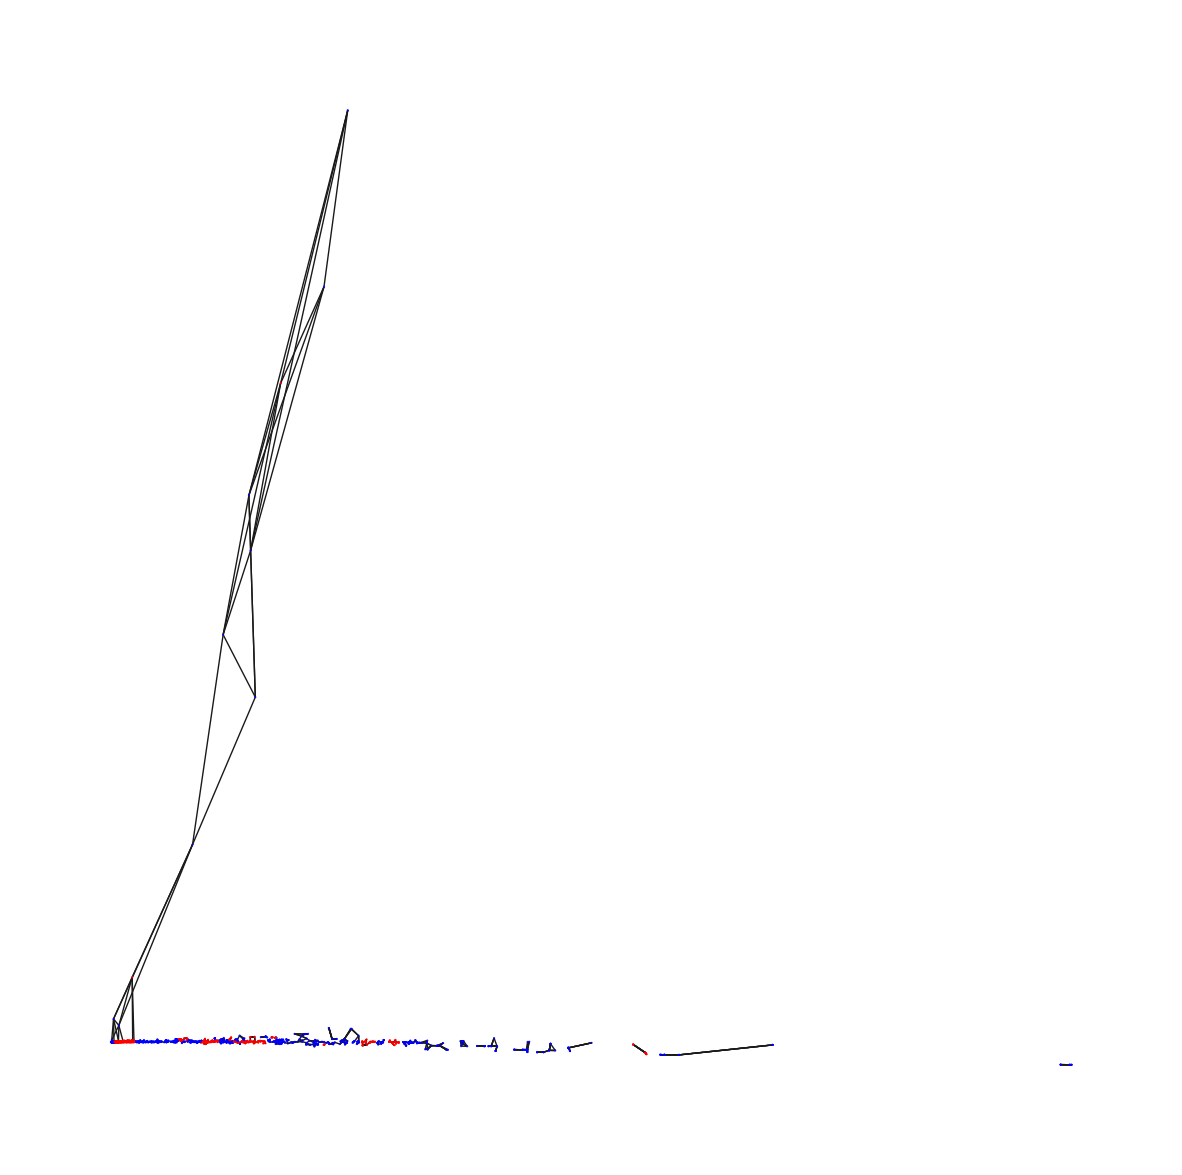

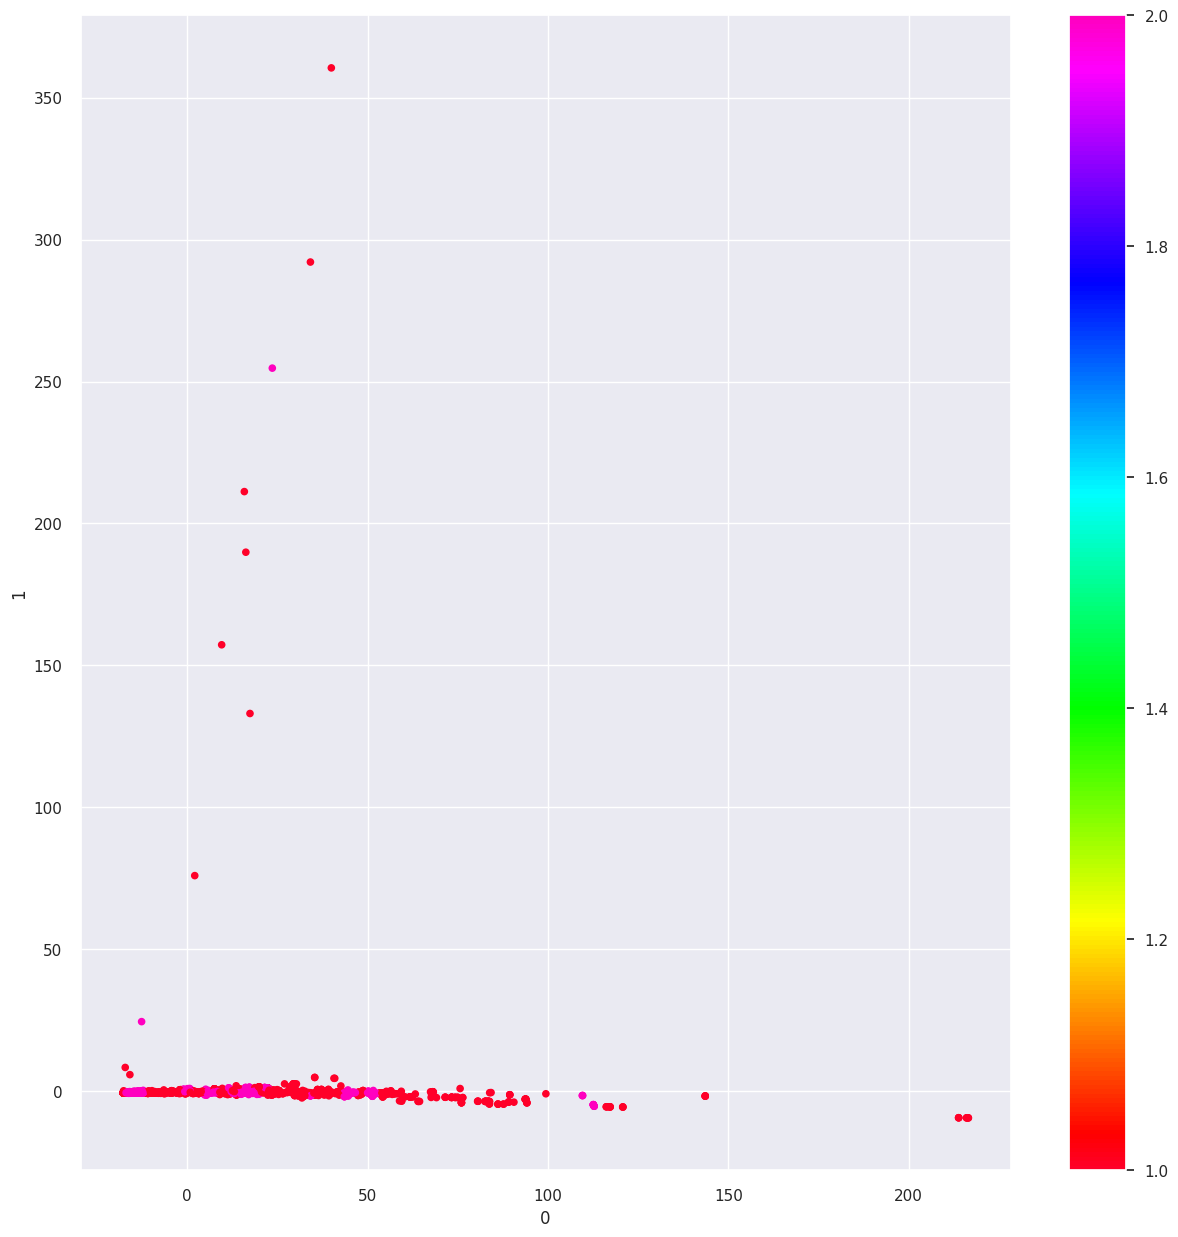

In [ ]:
res = cluster(r_undersampled_dataset, k=2, knn=4, m=2, alpha=2.0,verbose = True, plot_graph=True, plot_data=True)

In [ ]:
r_undersampled_dataset

,0,1,cluster
0,-17.661989,-0.501466,1
1,-17.636323,-0.534630,1
2,-17.376063,-0.593896,1
3,109.560799,-1.500767,0
4,-17.360545,-0.554708,1
...,...,...,...
2965,-17.637926,-0.590736,1
2966,-16.313822,-0.548871,0
2967,-14.400004,-0.510922,0
2968,-16.930275,-0.532445,0


In [ ]:
copy_r_undersampled_dataset = r_undersampled_dataset.drop(columns='cluster').copy()

In [ ]:
y_pred = r_undersampled_dataset['cluster']

In [ ]:
silhouette_avg = silhouette_score(copy_r_undersampled_dataset, y_pred)
silhouette_avg

0.0800095963515871

#### Feature Importance

##### show cluster label for each row of input dataset for chameleon

In [ ]:
# Merge the DataFrames output df claster label from chameleon and input of this algorithm to it.
merged_df = pd.concat([undersampled_dataset, r_undersampled_dataset['cluster']], axis=1)

# Print the merged DataFrame
merged_df

,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,FEATURE10,...,FEATURE73,FEATURE74,FEATURE75,FEATURE76,FEATURE77,FEATURE78,FEATURE79,FEATURE80,FEATURE81,cluster
0,-0.414624,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.683471,-0.329882,-0.603371,-0.533083,...,-0.274764,-0.390445,-0.501802,-0.296158,-0.034003,-0.878343,-0.596197,-0.542861,-0.572221,1
1,-0.411395,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.683471,-0.329882,-0.603371,-0.275166,...,-0.282714,-0.390445,-0.501802,-0.296158,-0.034003,-0.878343,-0.596197,-0.542861,-0.438186,1
2,-0.388797,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.683471,-0.329882,-0.700488,-0.533083,...,-0.258863,-0.378129,-0.501802,-0.296158,-0.034003,-0.878343,-0.514285,-0.542861,-0.706257,1
3,21.298996,0.444098,4.110341,5.618017,4.675123,4.259352,3.863831,3.580990,4.349559,0.240670,...,15.332191,18.218258,21.807810,1.632692,43.044045,0.157306,4.631729,3.521426,22.347851,0
4,-0.337144,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.380318,-0.329882,-0.506255,0.240670,...,-0.083950,-0.353498,-0.501802,-0.296158,-0.034003,1.192955,-0.596197,-0.542861,-0.572221,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,-0.401710,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.607683,-0.329882,-0.506255,-0.533083,...,-0.282714,-0.390445,-0.501802,-0.296158,-0.034003,-0.878343,-0.596197,-0.542861,-0.706257,1
2966,-0.262893,-0.073243,0.034108,0.083643,0.334809,0.899537,-0.152953,-0.329882,-0.117790,-0.017248,...,-0.258863,-0.267290,0.123701,-0.296158,-0.034003,-0.878343,-0.145680,-0.016773,0.634099,0
2967,0.150331,-0.073243,0.034108,0.083643,-0.026884,0.899537,-0.152953,-0.329882,-0.117790,-0.275166,...,-0.139604,0.003651,0.123701,0.668267,-0.034002,0.157306,-0.048874,-0.112426,0.500063,0
2968,-0.275806,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.077164,-0.329882,-0.409139,1.014423,...,-0.219110,-0.316552,-0.293301,-0.296158,-0.034003,0.157306,-0.391416,-0.367499,-0.706257,0


##### Split each cluster

In [ ]:
merged_df_0=merged_df[(merged_df['cluster'] == 0)].copy()
merged_df_1=merged_df[(merged_df['cluster'] == 1)].copy()

###### Feature Importance With PCA for each of cluster

In [ ]:
merged_df_0=merged_df_0.drop(columns = 'cluster').copy()
merged_df_1=merged_df_1.drop(columns = 'cluster').copy()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def analyze_pca(merged_df,cluster_label):
    """
    Perform PCA analysis on a DataFrame for a specific cluster.

    Parameters:
    - merged_df: DataFrame containing the merged data.
    - cluster_label: The cluster label for which PCA analysis is performed.
    - desired_variance_ratio: Desired level of explained variance (default is 0.95).

    Returns:
    - components_dict: Dictionary containing important features and loadings for each principal component.
    """


    # Perform PCA
    pca = PCA(2)
    X_pca = pca.fit_transform(merged_df)

    # Explained variance ratio for each principal component
    explained_variance_ratio = pca.explained_variance_ratio_

    # Cumulative explained variance
    cumulative_explained_variance = np.cumsum(explained_variance_ratio)

    # Plot the explained variance
    plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
    plt.xlabel('Number of Principal Components')
    plt.ylabel(f'Cumulative Explained Variance for Cluster {cluster_label}')
    plt.title(f'Explained Variance by Principal Components in Cluster {cluster_label}')
    plt.show()

    # Determine the number of components to retain based on explained variance
    desired_variance_ratio = 0.95  # Set your desired level of explained variance

    # Determine the number of components to retain based on explained variance
    num_components = np.argmax(cumulative_explained_variance >= desired_variance_ratio) + 1

    # Retain the selected number of components
    pca_selected = PCA(n_components=num_components)
    X_pca_selected = pca_selected.fit_transform(merged_df)

    # Identify the important features based on the loadings of the principal components
    principal_components_loadings = pca_selected.components_

    # Get the indices of features sorted by their importance
    sorted_feature_indices = np.argsort(np.abs(principal_components_loadings), axis=1)[:, ::-1]

    # Get the corresponding feature names
    feature_names = list(merged_df.columns)

    # Extract important features and loadings
    important_feature_names = [[feature_names[idx] for idx in component] for component in sorted_feature_indices]
    important_feature_loadings = [[principal_components_loadings[i][idx] for idx in component] for i, component in enumerate(sorted_feature_indices)]

    # Create a DataFrame to store the results
    result_df = pd.DataFrame({
        f"Component {i + 1} Features": features,
        f"Component {i + 1} Loadings": loadings
    } for i, (features, loadings) in enumerate(zip(important_feature_names, important_feature_loadings)))

    # Convert result_df to a dictionary
    result_dict = result_df.to_dict(orient='list')

    # Extract components from the dictionary
    components_dict = {}
    for i in range(1, num_components + 1):
        features_key = f'Component {i} Features'
        loadings_key = f'Component {i} Loadings'
        features = result_dict[features_key][0]
        loadings = result_dict[loadings_key][0]
        component_dict = dict(zip(features, loadings))
        components_dict[f'Component {i}'] = component_dict

    # Return the dictionary containing important features and loadings
    return components_dict

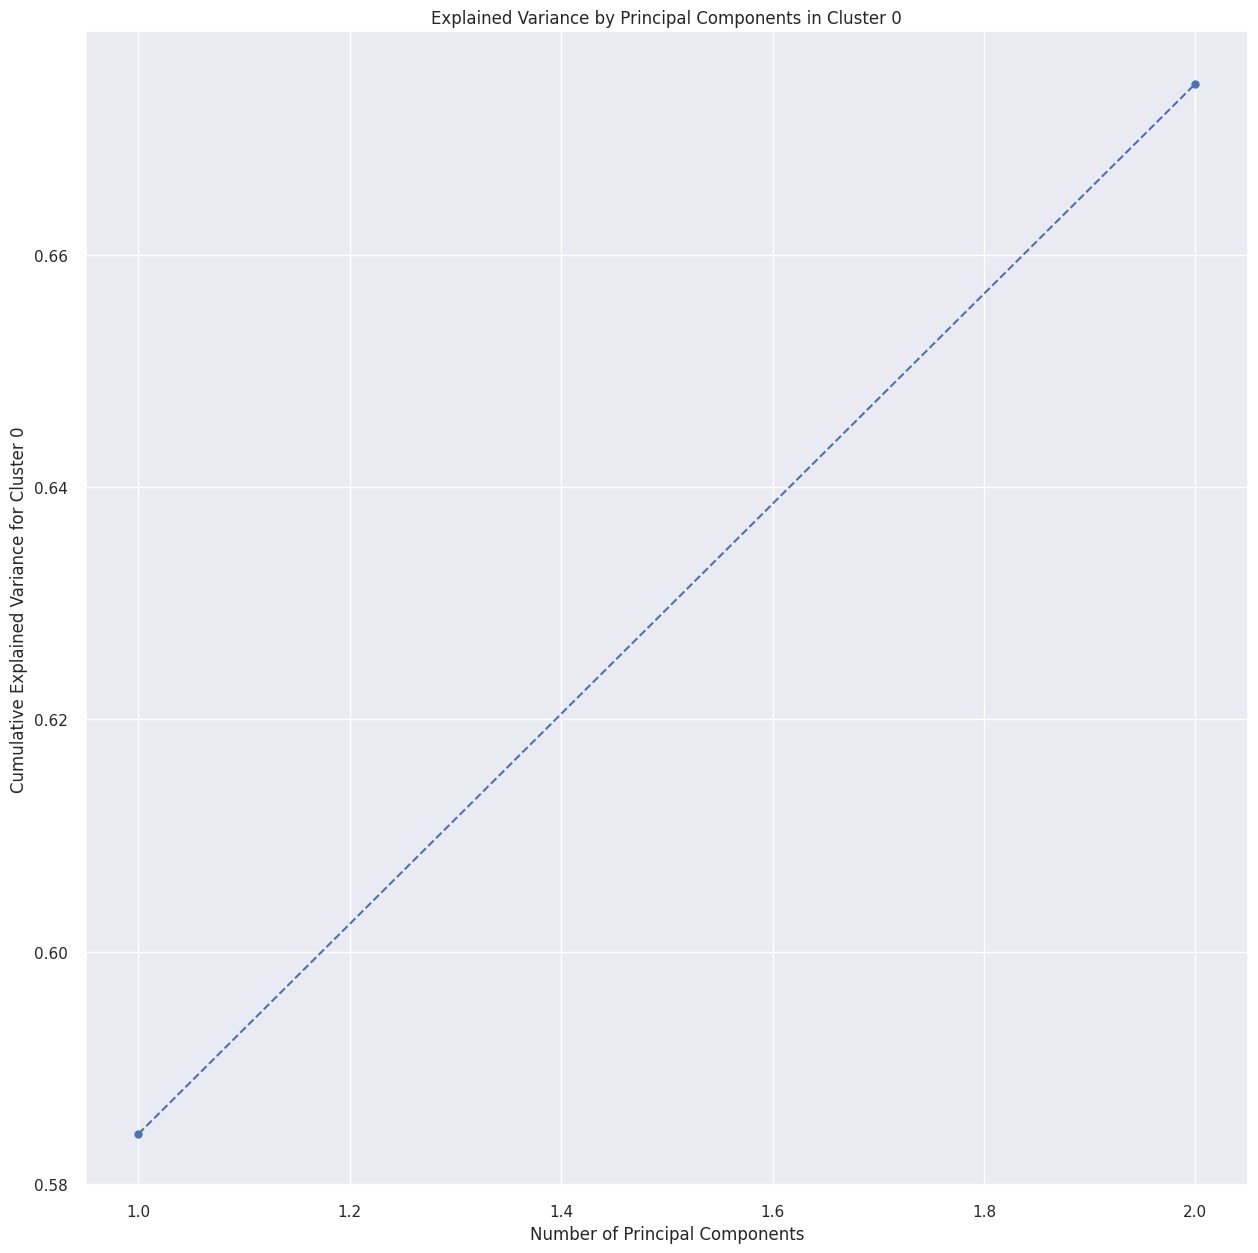

Component 1:
 {'FEATURE63': 0.22302762454764535, 'FEATURE32': 0.22273705764716742, 'FEATURE46': 0.22128412842190062, 'FEATURE25': 0.21603109757534372, 'FEATURE30': 0.2153819760554423, 'FEATURE42': 0.21528819332013263, 'FEATURE43': 0.21434408550411663, 'FEATURE29': 0.21191263179743794, 'FEATURE27': 0.2118910591385647, 'FEATURE41': 0.21174867736892336, 'FEATURE47': 0.2055259600896065, 'FEATURE1': 0.20015181548345254, 'FEATURE74': 0.19628128376196438, 'FEATURE73': 0.18886826866353024, 'FEATURE31': 0.17573832661431013, 'FEATURE44': 0.17161910672431074, 'FEATURE26': 0.16860657809716148, 'FEATURE24': 0.15813493285408736, 'FEATURE77': 0.15434446915883573, 'FEATURE48': 0.15200980239324946, 'FEATURE65': 0.15185804658380683, 'FEATURE18': 0.14174509145199118, 'FEATURE16': 0.13664122595391903, 'FEATURE23': 0.12167248067853863, 'FEATURE28': 0.11888592350714874, 'FEATURE34': 0.11653627074096996, 'FEATURE21': 0.11089555124839076, 'FEATURE35': 0.10687570410033177, 'FEATURE36': 0.10246315497912754, 'FE

In [ ]:
components_dict_cluster_0 = analyze_pca(merged_df_0,'0')
for component, feature_loadings in components_dict_cluster_0.items():
    print(f"{component}:\n", feature_loadings)

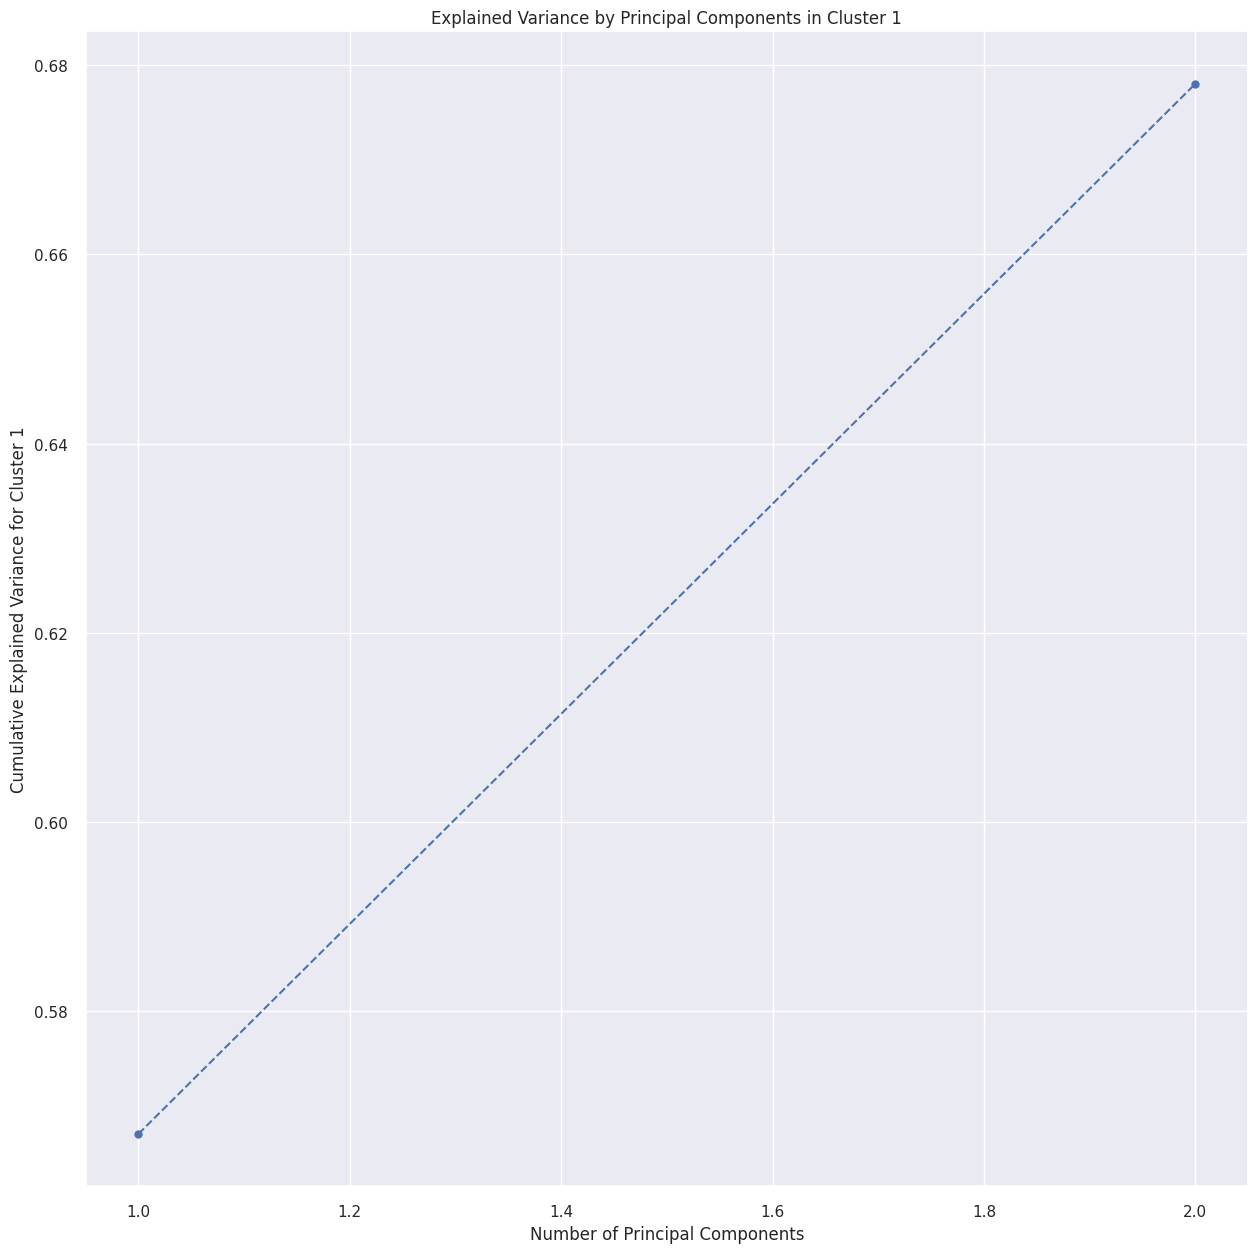

Component 1:
 {'FEATURE32': 0.23247773845249847, 'FEATURE43': 0.22681624290717164, 'FEATURE41': 0.22564616250221275, 'FEATURE46': 0.22095372214265682, 'FEATURE29': 0.22020737749333316, 'FEATURE63': 0.22014932471135662, 'FEATURE30': 0.21919449785182224, 'FEATURE42': 0.21293749891856686, 'FEATURE27': 0.21137894495514006, 'FEATURE25': 0.20413107705152156, 'FEATURE74': 0.1991550125764547, 'FEATURE22': 0.1893539740511231, 'FEATURE73': 0.18469250320629954, 'FEATURE1': 0.17929398693848306, 'FEATURE47': 0.17499527226915468, 'FEATURE31': 0.16241281945191194, 'FEATURE33': 0.15988676808537322, 'FEATURE44': 0.1598828231077892, 'FEATURE35': 0.15979446953151552, 'FEATURE65': 0.15496984213050805, 'FEATURE48': 0.1548721761053267, 'FEATURE26': 0.1539985731373976, 'FEATURE34': 0.1481568999037368, 'FEATURE18': 0.13066305933549938, 'FEATURE16': 0.1295475835356762, 'FEATURE24': 0.12506133126065436, 'FEATURE12': 0.10465484376115083, 'FEATURE75': 0.10194687817596577, 'FEATURE77': 0.10097554313146388, 'FEATUR

In [ ]:
components_dict_cluster_1 = analyze_pca(merged_df_1,'1')
for component, feature_loadings in components_dict_cluster_1.items():
    print(f"{component}:\n", feature_loadings)

In [ ]:
import matplotlib.pyplot as plt

def plot_feature_loadings(components_dict):
    """
    Plot feature loadings for each component.

    Parameters:
    - components_dict: Dictionary containing important features and loadings for each principal component.
    """

    for component, feature_loadings in components_dict.items():
        features = list(feature_loadings.keys())
        loadings = list(feature_loadings.values())

        # Sort features and loadings by absolute values of loadings
        sorted_indices = sorted(range(len(loadings)), key=lambda k: abs(loadings[k]), reverse=True)
        features_sorted = [features[i] for i in sorted_indices]
        loadings_sorted = [loadings[i] for i in sorted_indices]

        # Plot the bar chart
        plt.figure(figsize=(30, 6))
        plt.bar(features_sorted, loadings_sorted)
        plt.xlabel('Features')
        plt.ylabel('Loadings')
        plt.title(f'Feature Loadings for {component}')
        plt.xticks(rotation=45, ha='right')
        plt.show()


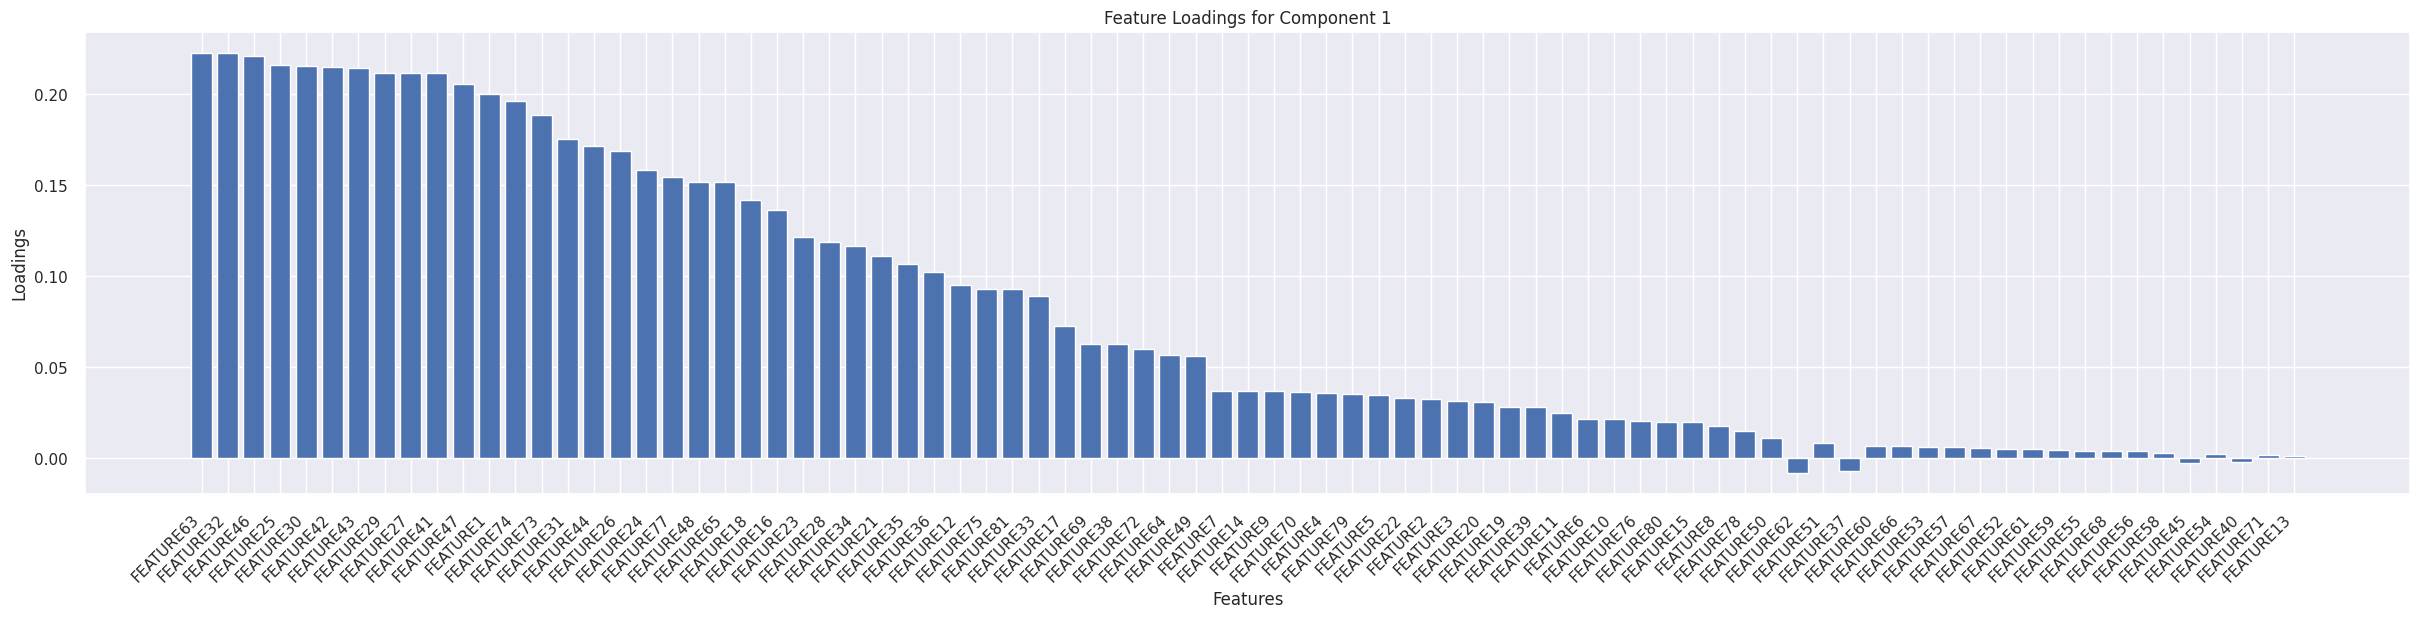

In [ ]:
#cluster 0
plot_feature_loadings(components_dict_cluster_0)

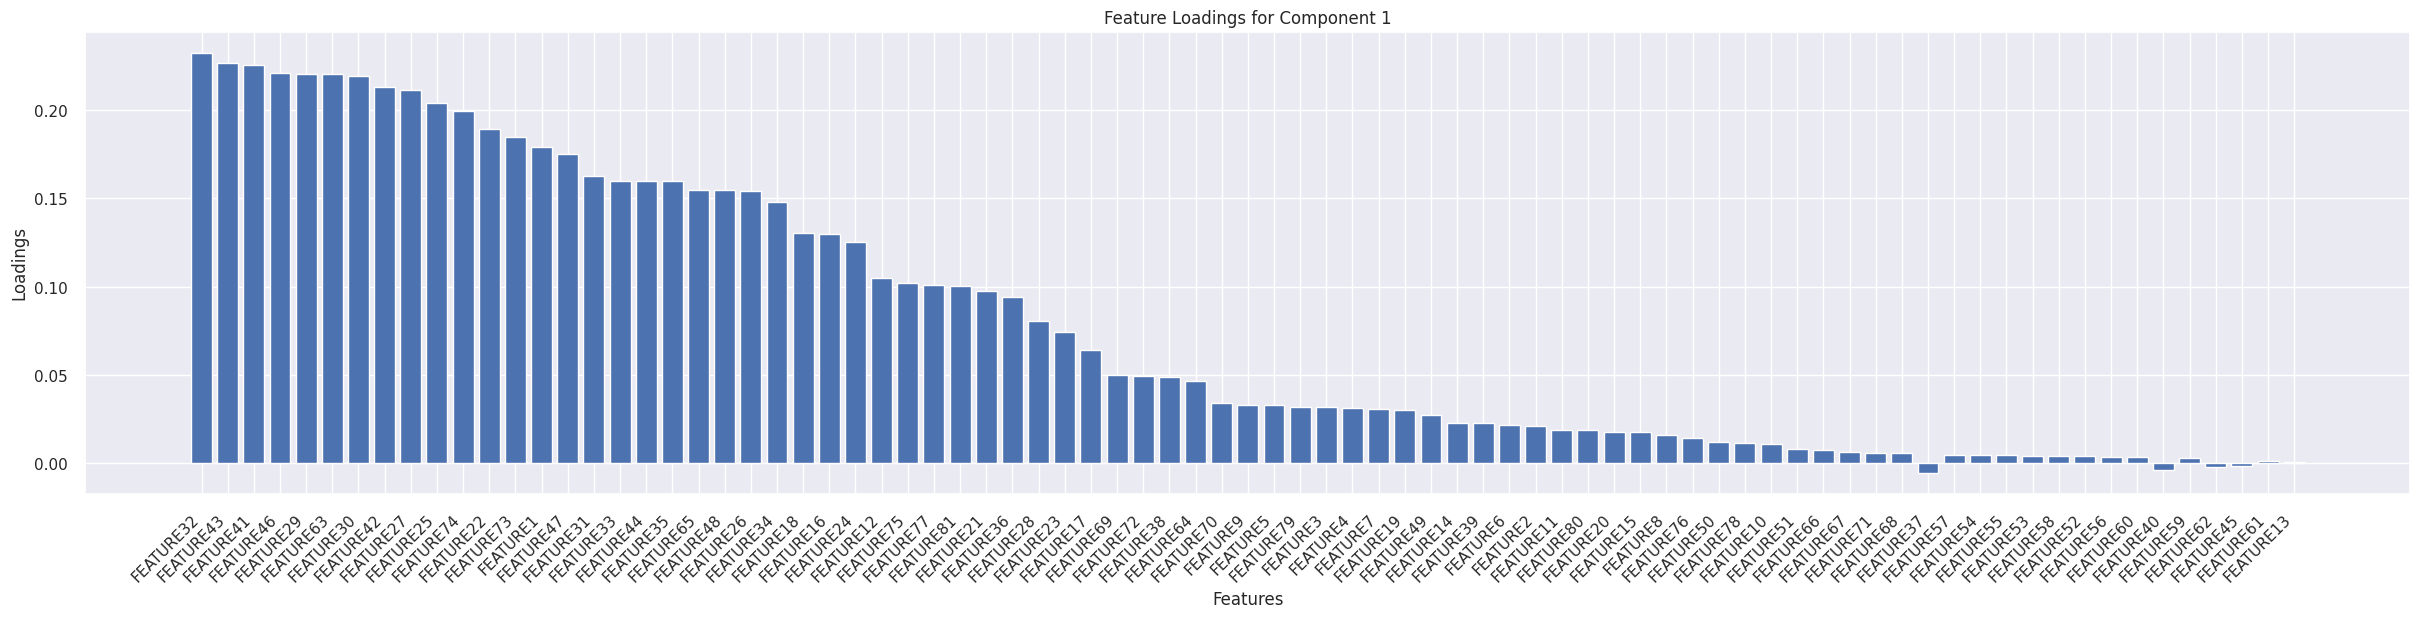

In [ ]:
# Cluster 1
plot_feature_loadings(components_dict_cluster_1)

###### Show list

for cluster 0

In [ ]:
components_dict_cluster_0

{'Component 1': {'FEATURE63': 0.22302762454764535,
  'FEATURE32': 0.22273705764716742,
  'FEATURE46': 0.22128412842190062,
  'FEATURE25': 0.21603109757534372,
  'FEATURE30': 0.2153819760554423,
  'FEATURE42': 0.21528819332013263,
  'FEATURE43': 0.21434408550411663,
  'FEATURE29': 0.21191263179743794,
  'FEATURE27': 0.2118910591385647,
  'FEATURE41': 0.21174867736892336,
  'FEATURE47': 0.2055259600896065,
  'FEATURE1': 0.20015181548345254,
  'FEATURE74': 0.19628128376196438,
  'FEATURE73': 0.18886826866353024,
  'FEATURE31': 0.17573832661431013,
  'FEATURE44': 0.17161910672431074,
  'FEATURE26': 0.16860657809716148,
  'FEATURE24': 0.15813493285408736,
  'FEATURE77': 0.15434446915883573,
  'FEATURE48': 0.15200980239324946,
  'FEATURE65': 0.15185804658380683,
  'FEATURE18': 0.14174509145199118,
  'FEATURE16': 0.13664122595391903,
  'FEATURE23': 0.12167248067853863,
  'FEATURE28': 0.11888592350714874,
  'FEATURE34': 0.11653627074096996,
  'FEATURE21': 0.11089555124839076,
  'FEATURE35': 0.

for cluster 1

In [ ]:
components_dict_cluster_1

{'Component 1': {'FEATURE32': 0.23247773845249847,
  'FEATURE43': 0.22681624290717164,
  'FEATURE41': 0.22564616250221275,
  'FEATURE46': 0.22095372214265682,
  'FEATURE29': 0.22020737749333316,
  'FEATURE63': 0.22014932471135662,
  'FEATURE30': 0.21919449785182224,
  'FEATURE42': 0.21293749891856686,
  'FEATURE27': 0.21137894495514006,
  'FEATURE25': 0.20413107705152156,
  'FEATURE74': 0.1991550125764547,
  'FEATURE22': 0.1893539740511231,
  'FEATURE73': 0.18469250320629954,
  'FEATURE1': 0.17929398693848306,
  'FEATURE47': 0.17499527226915468,
  'FEATURE31': 0.16241281945191194,
  'FEATURE33': 0.15988676808537322,
  'FEATURE44': 0.1598828231077892,
  'FEATURE35': 0.15979446953151552,
  'FEATURE65': 0.15496984213050805,
  'FEATURE48': 0.1548721761053267,
  'FEATURE26': 0.1539985731373976,
  'FEATURE34': 0.1481568999037368,
  'FEATURE18': 0.13066305933549938,
  'FEATURE16': 0.1295475835356762,
  'FEATURE24': 0.12506133126065436,
  'FEATURE12': 0.10465484376115083,
  'FEATURE75': 0.1019

###### Feature Importance with Supervised for all dataset.

In [ ]:
merged_df_0=merged_df[(merged_df['cluster'] == 0)].copy()
merged_df_1=merged_df[(merged_df['cluster'] == 1)].copy()

In [ ]:
# Get train and test data from dataframe without index
def get_train_test(df):
    X = df.loc[:, 'FEATURE1':'FEATURE81']
    y = df['cluster']
    # print(X.shape)
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # print(X_train)
    # print(y_train)
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = get_train_test(merged_df)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Create X_train and y_train
X_train_RF = np.vstack(X_train.to_numpy())
y_train_RF = np.array(y_train.to_numpy())


rf_model.fit(X_train_RF, y_train_RF)

RandomForestClassifier(random_state=42)

###### Show list

Top Features:
      Feature  Importance
24  FEATURE25    0.066146
26  FEATURE27    0.065341
29  FEATURE30    0.064754
28  FEATURE29    0.060026
31  FEATURE32    0.054496
0    FEATURE1    0.047947
46  FEATURE47    0.046198
30  FEATURE31    0.037638
40  FEATURE41    0.035676
25  FEATURE26    0.034936
71  FEATURE72    0.033757
73  FEATURE74    0.033321
42  FEATURE43    0.029098
41  FEATURE42    0.026051
72  FEATURE73    0.020992
63  FEATURE64    0.017870
23  FEATURE24    0.016405
62  FEATURE63    0.013165
33  FEATURE34    0.013051
43  FEATURE44    0.011769


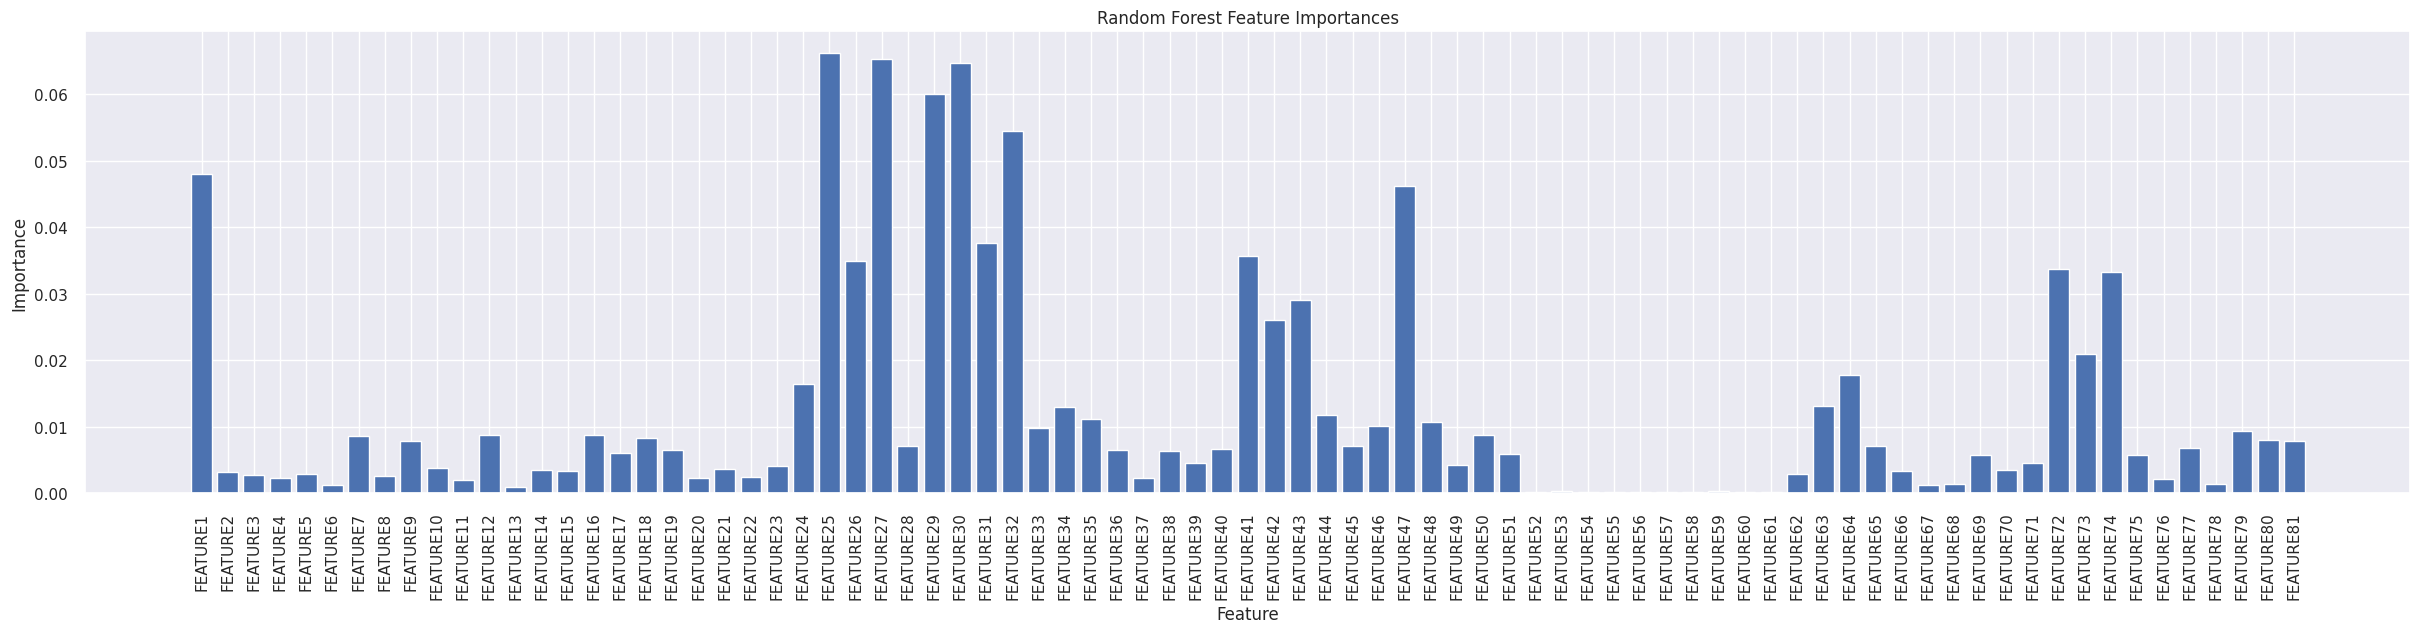

In [ ]:
# Extract feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print("Top Features:")
print(feature_importance_df.head(20))

# Plotting the feature importances
plt.figure(figsize=(30, 6))
plt.bar(range(len(feature_importances)), feature_importances, align='center')
plt.xticks(range(len(feature_importances)), X.columns, rotation=90)
plt.xlabel('Feature')
# Set y-axis to log scale
ax.set_yscale('log')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances')
plt.show()

#### analysis

##### silhouette_score

In [468]:
m=merged_df.drop(columns='cluster').copy()

In [470]:
silhouette_avg = silhouette_score(m.values, merged_df['cluster'])
silhouette_avg

0.053384169615627024

##### Calinski_score

In [471]:
calinski_index= calinski_harabasz_score(m.values, merged_df['cluster'])
calinski_index

106.06987979251377

##### Davies_bouldin_score

In [472]:
davies_bouldin_index = davies_bouldin_score(m.values, merged_df['cluster'])
davies_bouldin_index

3.6925681697479704

# Supervised

## Under sampling
for balancing data

In [ ]:
import pandas as pd
from sklearn.utils import resample

In [334]:
df

,Index,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,...,FEATURE74,FEATURE75,FEATURE76,FEATURE77,FEATURE78,FEATURE79,FEATURE80,FEATURE81,Class Label,y_pred
0,1,1.890391,-0.073243,0.034108,0.083643,-0.026884,-0.220401,0.377566,-0.329882,0.270675,...,1.050467,1.374707,-0.296158,-0.034001,0.157306,0.155906,-0.064600,2.644631,0,0
1,2,0.276235,-0.073243,0.034108,0.083643,-0.026884,-0.220401,0.225989,-0.329882,-0.214906,...,0.102175,-0.293301,0.668267,-0.034002,-0.878343,-0.160573,-0.495035,-0.438186,0,2
2,3,-0.414624,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.683471,-0.329882,-0.603371,...,-0.378129,-0.501802,-0.296158,-0.034003,-0.878343,-0.473329,-0.542861,-0.438186,0,1
3,4,-0.411395,-0.073243,0.034108,0.083643,-0.026884,-0.220401,-0.607683,-0.329882,-0.506255,...,3.033261,-0.501802,-0.296158,-0.034003,-0.878343,-0.719065,-1.068949,-0.706257,0,1
4,5,-0.366199,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.228741,-0.329882,-0.506255,...,-0.378129,-0.501802,-0.296158,-0.034003,0.157306,-0.596197,-0.542861,-0.572221,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298169,298170,-0.104706,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.304530,-0.329882,-0.506255,...,-0.230343,-0.501802,-0.296158,-0.034003,0.157306,-0.541589,-0.542861,-0.438186,0,1
298170,298171,-0.375884,-0.073243,0.034108,0.083643,-0.026884,-0.220401,0.225989,1.625554,0.270675,...,-0.365814,-0.501802,-0.296158,-0.034003,-0.878343,0.018145,-0.542861,-0.304150,0,1
298171,298172,-0.069194,0.030225,-0.373515,-0.469795,-0.388577,-0.220401,-0.456106,-0.329882,-0.506255,...,-0.094873,-0.501802,-0.296158,-0.034003,1.192955,-0.511134,-0.542861,-0.572221,0,1
298172,298173,-0.111162,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.607683,-0.329882,-0.603371,...,-0.045611,-0.501802,-0.296158,-0.034002,0.157306,-0.489711,-0.542861,-0.036079,0,1


In [336]:
columns_to_remove = ['Index', 'y_pred']  # Replace with your actual column names
df_4_under = df.drop(columns=columns_to_remove).copy()

In [337]:
df_4_under

,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,FEATURE10,...,FEATURE73,FEATURE74,FEATURE75,FEATURE76,FEATURE77,FEATURE78,FEATURE79,FEATURE80,FEATURE81,Class Label
0,1.890391,-0.073243,0.034108,0.083643,-0.026884,-0.220401,0.377566,-0.329882,0.270675,0.240670,...,0.210221,1.050467,1.374707,-0.296158,-0.034001,0.157306,0.155906,-0.064600,2.644631,0
1,0.276235,-0.073243,0.034108,0.083643,-0.026884,-0.220401,0.225989,-0.329882,-0.214906,1.014423,...,0.043259,0.102175,-0.293301,0.668267,-0.034002,-0.878343,-0.160573,-0.495035,-0.438186,0
2,-0.414624,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.683471,-0.329882,-0.603371,-0.533083,...,-0.282714,-0.378129,-0.501802,-0.296158,-0.034003,-0.878343,-0.473329,-0.542861,-0.438186,0
3,-0.411395,-0.073243,0.034108,0.083643,-0.026884,-0.220401,-0.607683,-0.329882,-0.506255,-0.533083,...,1.665174,3.033261,-0.501802,-0.296158,-0.034003,-0.878343,-0.719065,-1.068949,-0.706257,0
4,-0.366199,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.228741,-0.329882,-0.506255,0.756505,...,-0.266813,-0.378129,-0.501802,-0.296158,-0.034003,0.157306,-0.596197,-0.542861,-0.572221,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298169,-0.104706,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.304530,-0.329882,-0.506255,0.240670,...,-0.179357,-0.230343,-0.501802,-0.296158,-0.034003,0.157306,-0.541589,-0.542861,-0.438186,0
298170,-0.375884,-0.073243,0.034108,0.083643,-0.026884,-0.220401,0.225989,1.625554,0.270675,-0.533083,...,-0.258863,-0.365814,-0.501802,-0.296158,-0.034003,-0.878343,0.018145,-0.542861,-0.304150,0
298171,-0.069194,0.030225,-0.373515,-0.469795,-0.388577,-0.220401,-0.456106,-0.329882,-0.506255,-0.275166,...,-0.052148,-0.094873,-0.501802,-0.296158,-0.034003,1.192955,-0.511134,-0.542861,-0.572221,0
298172,-0.111162,-0.073243,-0.373515,-0.469795,-0.388577,-0.220401,-0.607683,-0.329882,-0.603371,-0.533083,...,0.027358,-0.045611,-0.501802,-0.296158,-0.034002,0.157306,-0.489711,-0.542861,-0.036079,0


In [338]:
# Create separate DataFrames for each cluster
cluster_0 = df_4_under[df_4_under['Class Label'] == 0]
cluster_1 = df_4_under[df_4_under['Class Label'] == 1]

In [339]:
# Undersample cluster 0 (more label)
undersampled_0 = resample(cluster_0, n_samples=2 * len(cluster_1), random_state=42)
# Combine the undersampled cluster B with cluster A
undersampled_dataset = pd.concat([cluster_1, undersampled_0])

# Shuffle the combined dataset
undersampled_dataset = undersampled_dataset.sample(frac=1, random_state=42).reset_index(drop=True)

In [340]:
undersampled_dataset['Class Label'].value_counts()

0    1980
1     990
Name: Class Label, dtype: int64

In [341]:
# Get train and test data from dataframe without index
def get_train_test(df):
    X = df.loc[:, 'FEATURE1':'FEATURE81']
    y = df['Class Label']
    print(X.shape)
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(X_train)
    print(y_train)
    return X_train, X_test, y_train, y_test

In [342]:
X_train, X_test, y_train, y_test = get_train_test(undersampled_dataset)

(2970, 81)
       FEATURE1  FEATURE2  FEATURE3  FEATURE4  FEATURE5  FEATURE6  FEATURE7  \
1551  16.101416 -0.073243  1.664601  1.743955  1.781580  0.899537  1.438603   
509   -0.401710 -0.073243  0.034108  0.083643 -0.026884 -0.220401 -0.380318   
1550  -0.311318 -0.073243  1.256978  1.190518  1.058194  2.019475  1.211238   
678   -0.178957 -0.073243 -0.373515 -0.469795 -0.388577 -0.220401 -0.683471   
2364  -0.237066 -0.073243 -0.373515 -0.469795 -0.388577 -0.220401 -0.683471   
...         ...       ...       ...       ...       ...       ...       ...   
1638  11.588237 -0.073243  2.072225  2.297393  1.781580  0.899537  4.849080   
1095  12.537360  0.133693  0.034108  0.083643 -0.026884 -0.220401  0.832296   
1130   0.237495 -0.073243  0.441732  0.637080  0.334809 -0.220401  1.362815   
1294  -0.085336 -0.073243 -0.373515 -0.469795 -0.388577 -0.220401 -0.531895   
860   -0.285491 -0.073243 -0.373515 -0.469795 -0.388577 -0.220401 -0.152953   

      FEATURE8  FEATURE9  FEATURE10  ...

## Random Forest

In [343]:
from sklearn.ensemble import RandomForestClassifier

In [344]:
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

to prevent from overfit i perform cross-validation.

### With Cross-validation

In [345]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [346]:
#Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [347]:
X = undersampled_dataset.loc[:, 'FEATURE1':'FEATURE81']
y = undersampled_dataset['Class Label']

In [355]:
# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=cv, scoring='precision')  # Adjust scoring metric as needed
rf_cv_roc_precision = cv_scores.mean()
# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

Cross-validation scores: [0.98507463 0.98507463 0.99497487 0.98984772 0.98994975]
Mean accuracy: 0.9889843185165924


In [351]:
# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=cv, scoring='accuracy')  # Adjust scoring metric as needed
rf_cv_accuracy = cv_scores.mean()
# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

Cross-validation scores: [0.99494949 0.99494949 0.9983165  0.99158249 0.99494949]
Mean accuracy: 0.9949494949494948


In [352]:
cross_val_score(rf_model, X, y, cv=cv, scoring='recall')
rf_cv_recall = cv_scores.mean()
# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

Cross-validation scores: [0.99494949 0.99494949 0.9983165  0.99158249 0.99494949]
Mean accuracy: 0.9949494949494948


In [353]:
cross_val_score(rf_model, X, y, cv=cv, scoring='f1')
rf_cv_f1 = cv_scores.mean()
# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

Cross-validation scores: [0.99494949 0.99494949 0.9983165  0.99158249 0.99494949]
Mean accuracy: 0.9949494949494948


In [354]:
cross_val_score(rf_model, X, y, cv=cv, scoring='roc_auc')
rf_cv_roc_auc = cv_scores.mean()
# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

Cross-validation scores: [0.99494949 0.99494949 0.9983165  0.99158249 0.99494949]
Mean accuracy: 0.9949494949494948


In [356]:
print(rf_cv_roc_precision,
rf_cv_accuracy,
rf_cv_recall,
rf_cv_f1,
rf_cv_roc_auc)

0.9889843185165924 0.9949494949494948 0.9949494949494948 0.9949494949494948 0.9949494949494948


### Without cross-validation

In [357]:
# Create X_train and y_train
X_train_RF = np.vstack(X_train.to_numpy())
y_train_RF = np.array(y_train.to_numpy())

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_RF, y_train_RF)

RandomForestClassifier(random_state=42)

### Extract feature importances

In [393]:
# Extract feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

Top Features:
      Feature  Importance
46  FEATURE47    0.117379
0    FEATURE1    0.106659
26  FEATURE27    0.105546
30  FEATURE31    0.082545
28  FEATURE29    0.082294
25  FEATURE26    0.080610
29  FEATURE30    0.070676
31  FEATURE32    0.058688
24  FEATURE25    0.049715
42  FEATURE43    0.034965
40  FEATURE41    0.026173
23  FEATURE24    0.018931
62  FEATURE63    0.017184
72  FEATURE73    0.016888
47  FEATURE48    0.016339
64  FEATURE65    0.016001
27  FEATURE28    0.010890
71  FEATURE72    0.010655
63  FEATURE64    0.010465
76  FEATURE77    0.009152


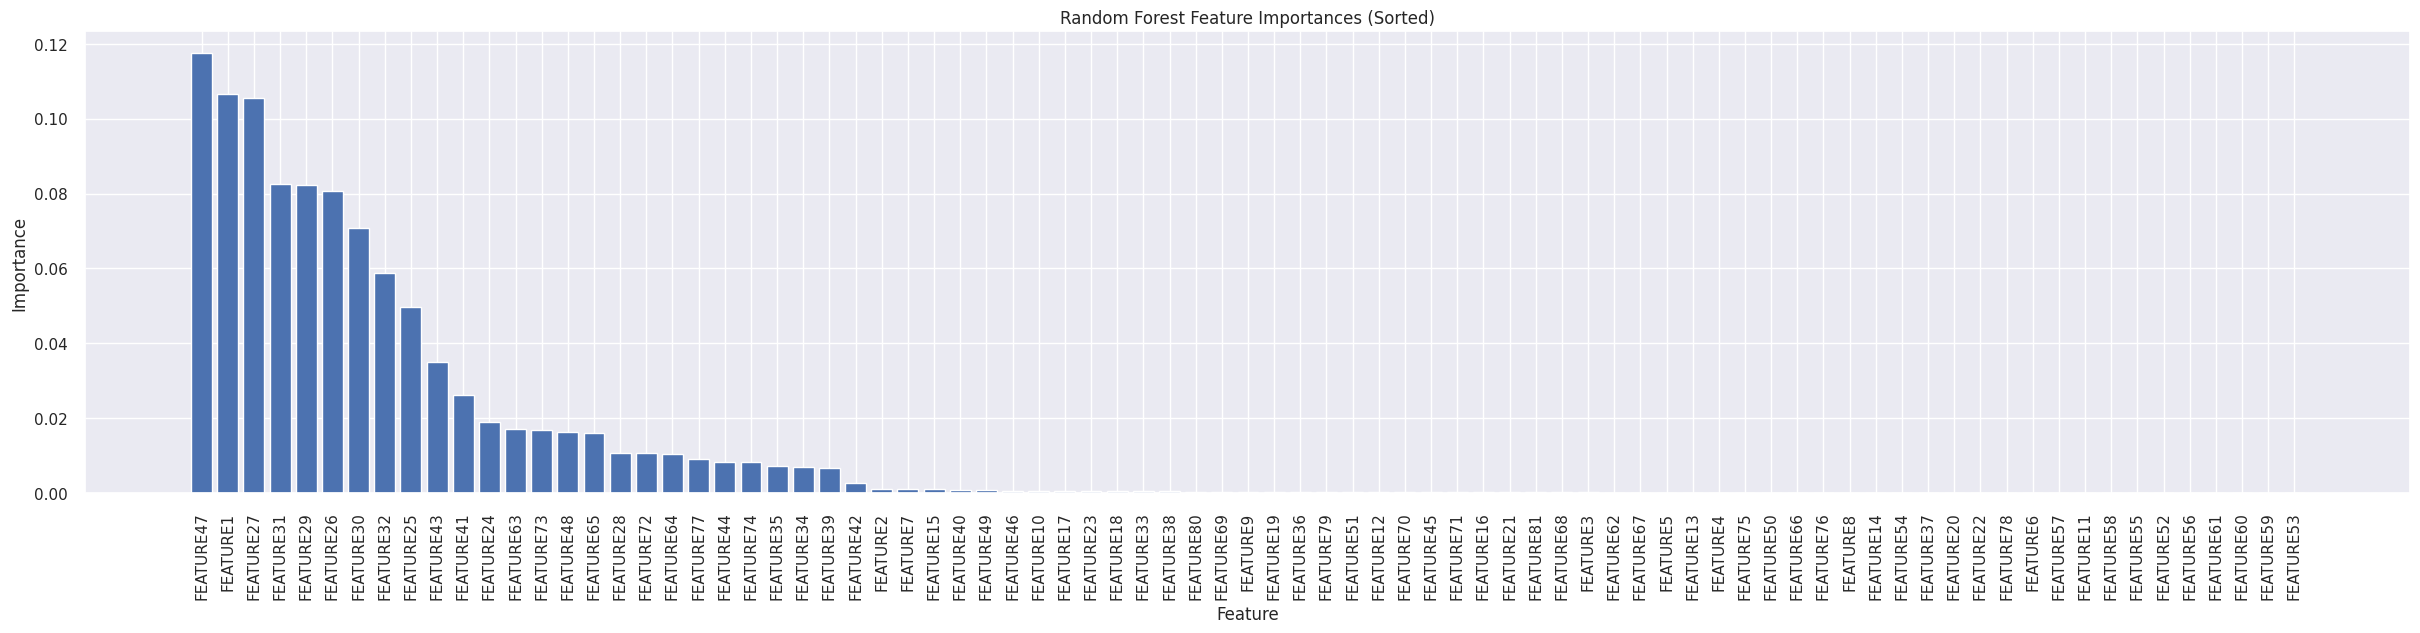

In [395]:
# Display the top features
print("Top Features:")
print(feature_importance_df.head(20))

# Plotting the sorted feature importances
plt.figure(figsize=(30, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], align='center')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances (Sorted)')
plt.xticks(rotation=90)
plt.show()

### Evaluation

In [396]:
X_test_RF = np.vstack(X_test.to_numpy())
y_test_RF = np.array(y_test)

In [397]:
# Predictions
rf_predictions = rf_model.predict(X_test_RF)

In [360]:
# Replace 'binary' with the desired average setting ('micro', 'macro', 'weighted', or None)
average_setting = 'macro'
# Calculate precision, recall, and F1-score with the specified average setting and conf_matrix
precision = precision_score(y_test_RF, rf_predictions, average=average_setting)
recall = recall_score(y_test_RF, rf_predictions, average=average_setting)
f1 = f1_score(y_test_RF, rf_predictions, average=average_setting)
conf_matrix = confusion_matrix(y_test_RF, rf_predictions)

# Print additional metrics
print("RF Precision:", precision)
print("RF Recall:", recall)
print("RF F1-Score:", f1)
print("RF Confusion Matrix:")
print(conf_matrix)


RF Precision: 0.9963008170585891
RF Recall: 0.9963008170585891
RF F1-Score: 0.9963008170585891
RF Confusion Matrix:
[[385   1]
 [  1 207]]


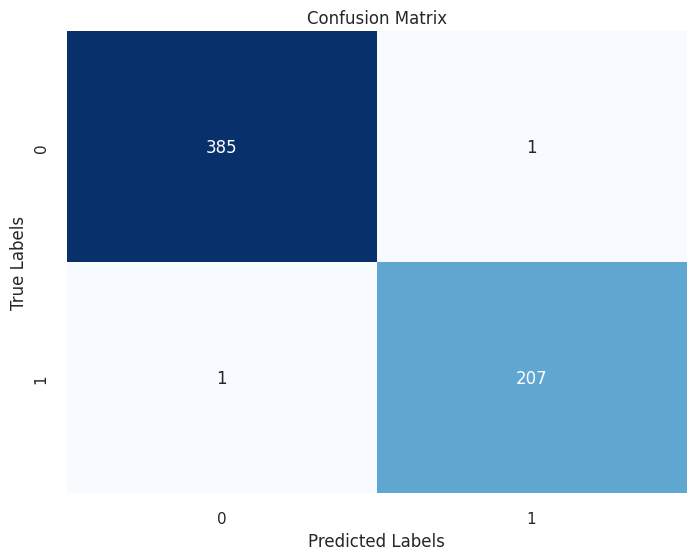

In [361]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [373]:
from sklearn.metrics import accuracy_score, classification_report
# Calculate accuracy
rf_accuracy = accuracy_score(y_test_RF, rf_predictions)
print("RF Accuracy:", rf_accuracy)
print("RF Classification Report:")
print(classification_report(y_test_RF, rf_predictions))

RF Accuracy: 0.9966329966329966
RF Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       386
           1       1.00      1.00      1.00       208

    accuracy                           1.00       594
   macro avg       1.00      1.00      1.00       594
weighted avg       1.00      1.00      1.00       594



In [402]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test_RF, rf_predictions)

# Display results
for label, prec, rec, f, supp in zip([0, 1], precision, recall, fscore, support):
    print(f"Class {label}:")
    print(f"  Precision: {prec}")
    print(f"  Recall: {rec}")
    print(f"  F1-score: {f}")
    print(f"  Support: {supp}")

Class 0:
  Precision: 0.9974093264248705
  Recall: 0.9974093264248705
  F1-score: 0.9974093264248705
  Support: 386
Class 1:
  Precision: 0.9951923076923077
  Recall: 0.9951923076923077
  F1-score: 0.9951923076923077
  Support: 208


In [404]:
rmse_rf = mean_squared_error(y_test_RF, rf_predictions, squared=False)
rmse_rf

0.058025885318565944

ROC curve

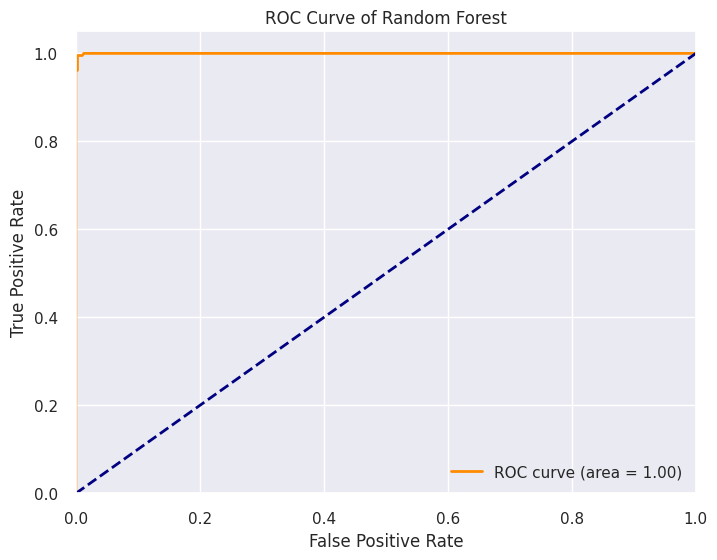

In [406]:
# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test_RF, rf_model.predict_proba(X_test_RF)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Random Forest')
plt.legend(loc="lower right")
plt.show()

## GradientBoostingClassifier

In [364]:
from sklearn.ensemble import GradientBoostingClassifier

In [365]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

In [366]:
# Prepare X_train and y_train
X_train_GB = np.vstack(X_train.to_numpy())
y_train_GB = np.array(y_train.to_numpy())

In [367]:
gb_model.fit(X_train_GB, y_train_GB)

### Extract feature importances

In [408]:
# Extract feature importances
feature_importances = gb_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

Top Features:
      Feature  Importance
0    FEATURE1    0.974392
28  FEATURE29    0.004964
25  FEATURE26    0.002375
18  FEATURE19    0.002047
48  FEATURE49    0.001880
69  FEATURE70    0.001844
79  FEATURE80    0.001771
30  FEATURE31    0.001556
6    FEATURE7    0.000872
23  FEATURE24    0.000812
33  FEATURE34    0.000646
34  FEATURE35    0.000618
1    FEATURE2    0.000609
70  FEATURE71    0.000597
22  FEATURE23    0.000571
32  FEATURE33    0.000519
50  FEATURE51    0.000470
29  FEATURE30    0.000318
63  FEATURE64    0.000303
17  FEATURE18    0.000280


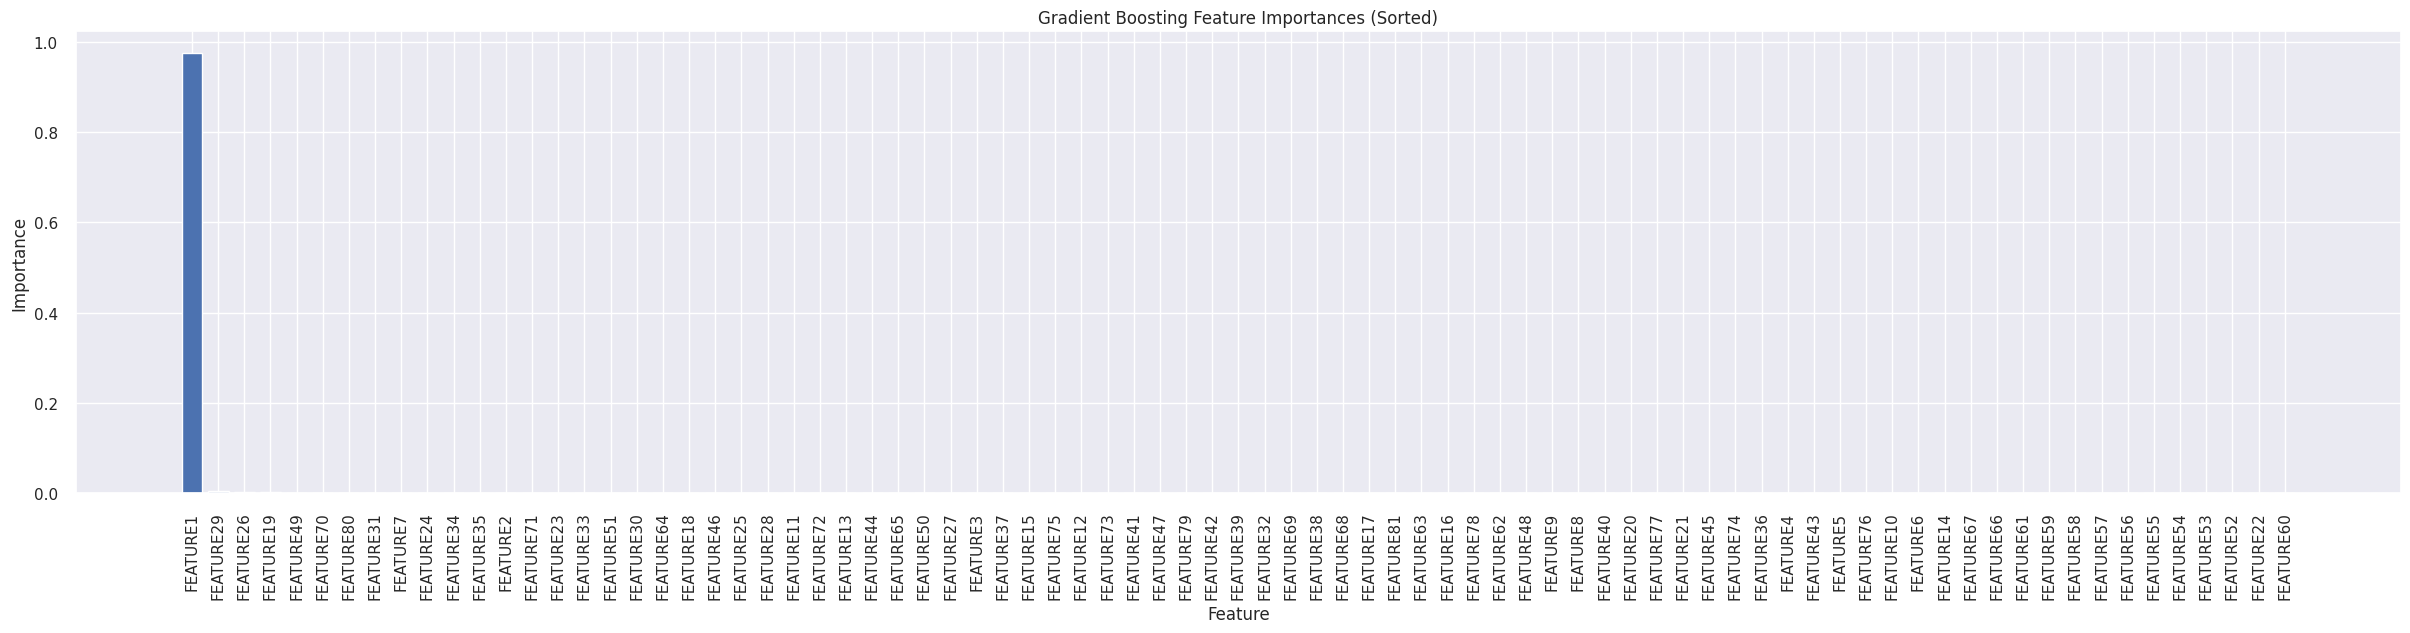

In [410]:
# Display the top features
print("Top Features:")
print(feature_importance_df.head(20))

# Plotting the sorted feature importances
plt.figure(figsize=(30, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], align='center')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Gradient Boosting Feature Importances (Sorted)')
plt.xticks(rotation=90)
plt.show()

In [411]:
# Prepare X_test and y_test
X_test_GB = np.vstack(X_test.to_numpy())
y_test_GB = np.array(y_test)

In [412]:
# Predictions
gb_predictions = gb_model.predict(X_test_GB)

### Evaluation

In [413]:
  # Replace 'binary' with the desired average setting ('micro', 'macro', 'weighted', or None)
average_setting = 'macro'
# Calculate precision, recall, and F1-score with the specified average setting and conf_matrix
precision = precision_score(y_test_GB, gb_predictions, average=average_setting)
recall = recall_score(y_test_GB, gb_predictions, average=average_setting)
f1 = f1_score(y_test_GB, gb_predictions, average=average_setting)
conf_matrix = confusion_matrix(y_test_GB, gb_predictions)

# Print additional metrics
print("GB Precision:", precision)
print("GB Recall:", recall)
print("GB F1-Score:", f1)
print("GB Confusion Matrix:")
print(conf_matrix)

GB Precision: 0.9912931131333558
GB Recall: 0.990197787963332
GB F1-Score: 0.9907417509624526
GB Confusion Matrix:
[[384   2]
 [  3 205]]


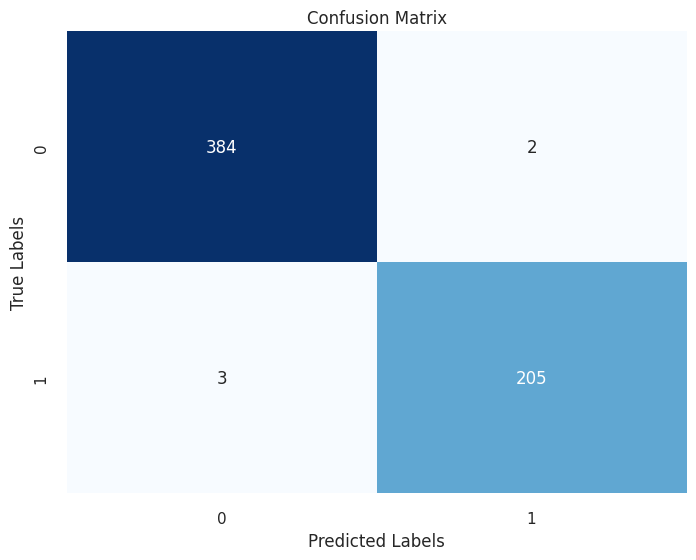

In [414]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [415]:
from sklearn.metrics import accuracy_score, classification_report
# Calculate accuracy
rf_accuracy = accuracy_score(y_test_GB, gb_predictions)
print("RF Accuracy:", rf_accuracy)
print("RF Classification Report:")
print(classification_report(y_test_GB, gb_predictions))

RF Accuracy: 0.9915824915824916
RF Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       386
           1       0.99      0.99      0.99       208

    accuracy                           0.99       594
   macro avg       0.99      0.99      0.99       594
weighted avg       0.99      0.99      0.99       594



In [416]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test_GB, gb_predictions)

# Display results
for label, prec, rec, f, supp in zip([0, 1], precision, recall, fscore, support):
    print(f"Class {label}:")
    print(f"  Precision: {prec}")
    print(f"  Recall: {rec}")
    print(f"  F1-score: {f}")
    print(f"  Support: {supp}")

Class 0:
  Precision: 0.9922480620155039
  Recall: 0.9948186528497409
  F1-score: 0.9935316946959897
  Support: 386
Class 1:
  Precision: 0.9903381642512077
  Recall: 0.9855769230769231
  F1-score: 0.9879518072289156
  Support: 208


In [418]:
rmse_rf = mean_squared_error(y_test_GB, gb_predictions, squared=False)
rmse_rf

0.09174698042719671

ROC curve

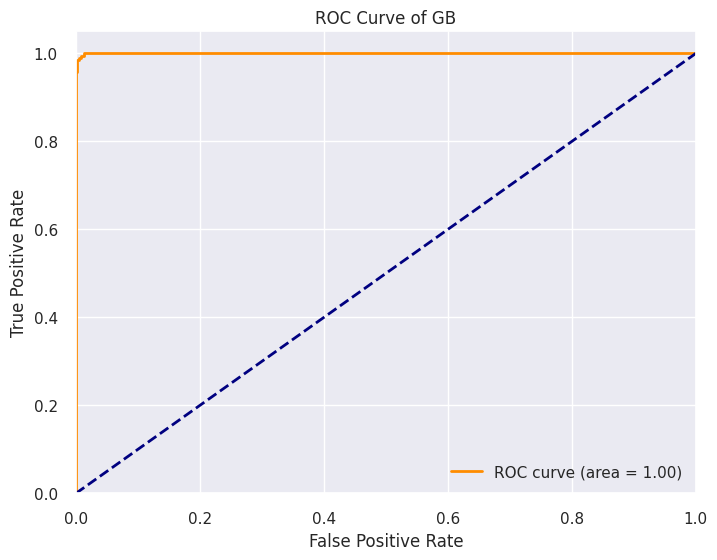

In [420]:
# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test_GB, gb_model.predict_proba(X_test_GB)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of GB')
plt.legend(loc="lower right")
plt.show()

##Decision Tree

In [421]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)

In [423]:
# Prepare X_train and y_train
X_train_DT = np.vstack(X_train.to_numpy())
y_train_DT = np.array(y_train.to_numpy())

In [426]:
dt_model.fit(X_train_DT, y_train_DT)

DecisionTreeClassifier(random_state=42)

### Extract feature importances

In [427]:
# Extract feature importances
feature_importances = dt_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

Top Features:
      Feature  Importance
0    FEATURE1    0.979233
79  FEATURE80    0.003304
32  FEATURE33    0.003119
28  FEATURE29    0.002648
25  FEATURE26    0.001904
30  FEATURE31    0.001884
34  FEATURE35    0.001879
69  FEATURE70    0.001875
72  FEATURE73    0.001716
45  FEATURE46    0.001271
6    FEATURE7    0.000664
1    FEATURE2    0.000503
52  FEATURE53    0.000000
55  FEATURE56    0.000000
76  FEATURE77    0.000000
54  FEATURE55    0.000000
77  FEATURE78    0.000000
53  FEATURE54    0.000000
78  FEATURE79    0.000000
73  FEATURE74    0.000000


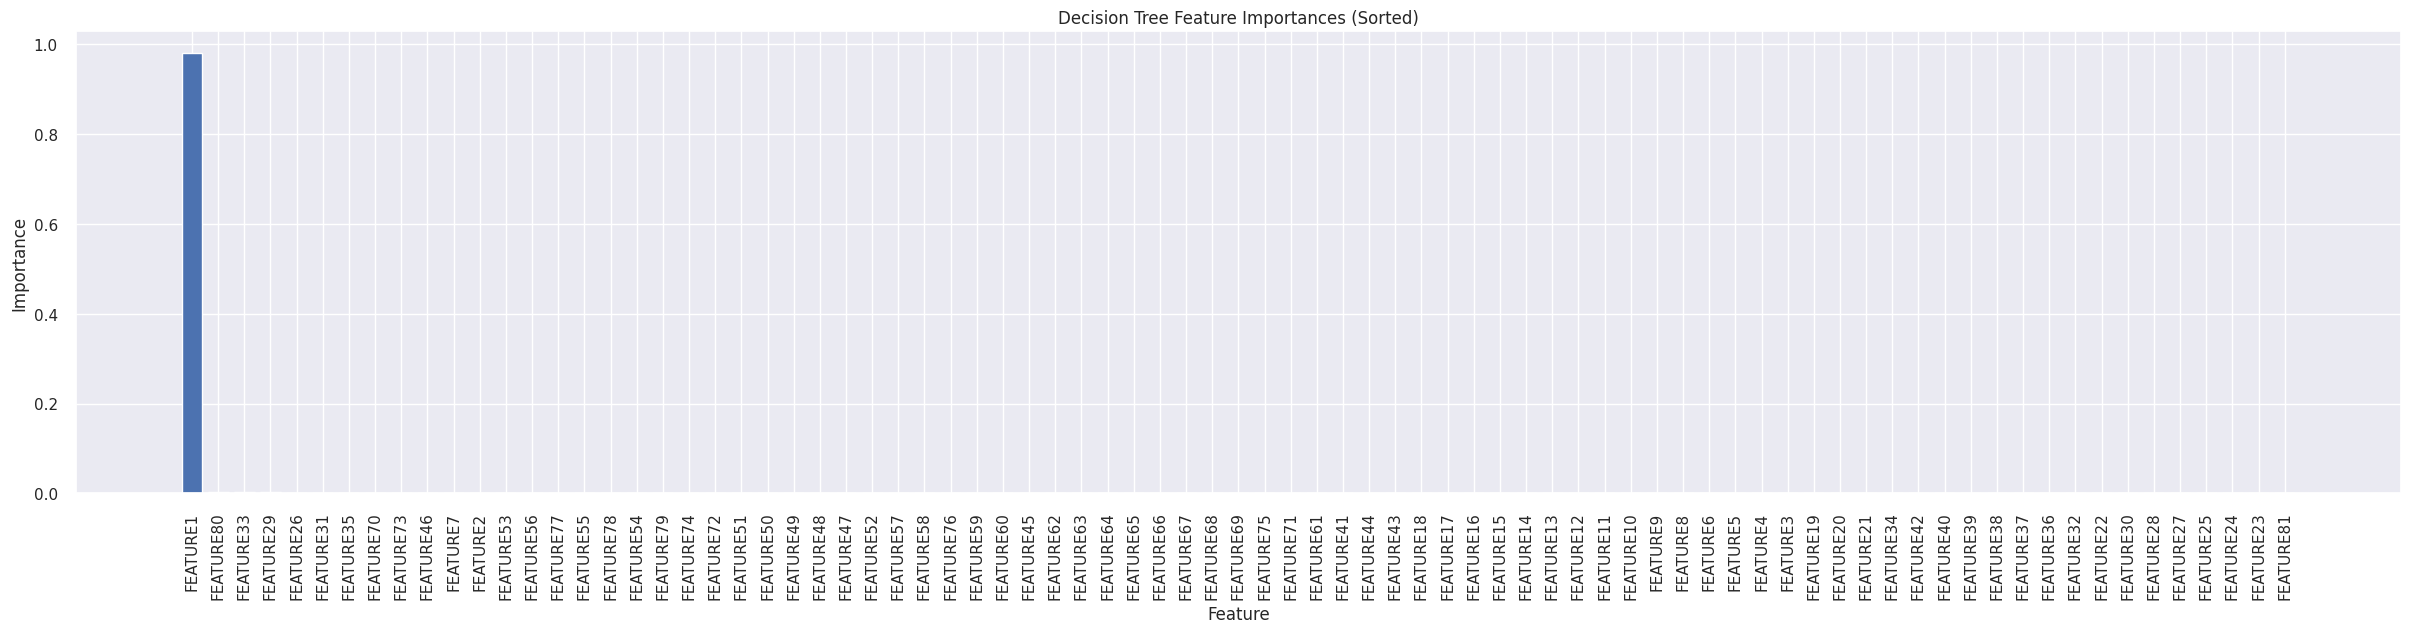

In [429]:
# Display the top features
print("Top Features:")
print(feature_importance_df.head(20))

# Plotting the sorted feature importances
plt.figure(figsize=(30, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], align='center')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Decision Tree Feature Importances (Sorted)')
plt.xticks(rotation=90)
plt.show()

In [430]:
# Prepare X_test and y_test
X_test_DT = np.vstack(X_test.to_numpy())
y_test_DT = np.array(y_test)

In [431]:
# Predictions
dt_predictions = dt_model.predict(X_test_DT)

### Evaluation

In [432]:
  # Replace 'binary' with the desired average setting ('micro', 'macro', 'weighted', or None)
average_setting = 'macro'
# Calculate precision, recall, and F1-score with the specified average setting and conf_matrix
precision = precision_score(y_test_DT, dt_predictions, average=average_setting)
recall = recall_score(y_test_DT, dt_predictions, average=average_setting)
f1 = f1_score(y_test_DT, dt_predictions, average=average_setting)
conf_matrix = confusion_matrix(y_test_DT, dt_predictions)

# Print additional metrics
print("DT Precision:", precision)
print("DT Recall:", recall)
print("DT F1-Score:", f1)
print("DT Confusion Matrix:")
print(conf_matrix)

DT Precision: 0.9899909918927035
DT Recall: 0.9877939418094859
DT F1-Score: 0.9888776541961577
DT Confusion Matrix:
[[384   2]
 [  4 204]]


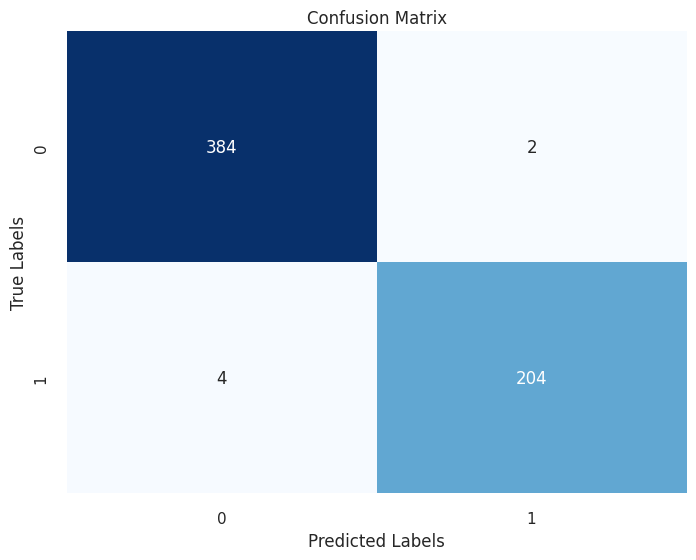

In [433]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [434]:
from sklearn.metrics import accuracy_score, classification_report
# Calculate accuracy
dt_accuracy = accuracy_score(y_test_DT, dt_predictions)
print("RF Accuracy:", dt_accuracy)
print("RF Classification Report:")
print(classification_report(y_test_DT, dt_predictions))

RF Accuracy: 0.98989898989899
RF Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       386
           1       0.99      0.98      0.99       208

    accuracy                           0.99       594
   macro avg       0.99      0.99      0.99       594
weighted avg       0.99      0.99      0.99       594



In [435]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test_DT, dt_predictions)

# Display results
for label, prec, rec, f, supp in zip([0, 1], precision, recall, fscore, support):
    print(f"Class {label}:")
    print(f"  Precision: {prec}")
    print(f"  Recall: {rec}")
    print(f"  F1-score: {f}")
    print(f"  Support: {supp}")

Class 0:
  Precision: 0.9896907216494846
  Recall: 0.9948186528497409
  F1-score: 0.9922480620155039
  Support: 386
Class 1:
  Precision: 0.9902912621359223
  Recall: 0.9807692307692307
  F1-score: 0.9855072463768114
  Support: 208


In [436]:
rmse_rf = mean_squared_error(y_test_DT, dt_predictions, squared=False)
rmse_rf

0.10050378152592121

ROC curve

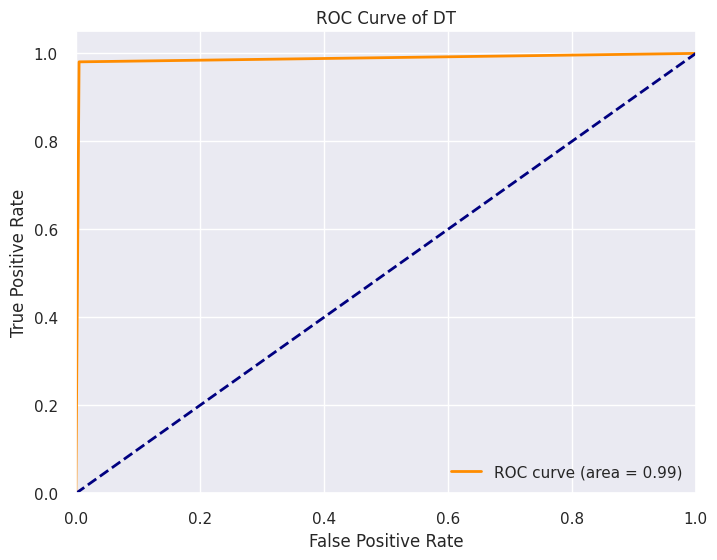

In [437]:
# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test_DT, dt_model.predict_proba(X_test_DT)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of DT')
plt.legend(loc="lower right")
plt.show()